#### Master Thesis 2024 - Diksha Acharya

# 6- Heat index category analysis for 3h & daily
## Master Thesis 2024
---

6.1 - Imports and tables

In [1]:
# Import 
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import os
from shapely.geometry import Point
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Indian states shapefile
shapefile_path = "Indian_States"
Indian_states = gpd.read_file(shapefile_path)

In [3]:
# State capitals data
capitals_df = pd.DataFrame({
    "State": [
        "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
        "Goa", "Gujarat", "Haryana", "Himachal Pradesh","Jammu Kashmir", "Jharkhand",
        "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
        "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
        "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
        "Uttar Pradesh", "Uttarakhand", "West Bengal"
    ],
    "Capital": [
        "Amaravati", "Itanagar", "Dispur", "Patna", "Raipur",
        "Panaji", "Gandhinagar", "Chandigarh", "Shimla", "Jammu", "Ranchi",
        "Bengaluru", "Thiruvananthapuram", "Bhopal", "Mumbai", "Imphal",
        "Shillong", "Aizawl", "Kohima", "Bhubaneswar", "Chandigarh",
        "Jaipur", "Gangtok", "Chennai", "Hyderabad", "Agartala",
        "Lucknow", "Dehradun", "Kolkata"
    ],
    "Latitude": [
        14.9062, 28.0844, 26.5438, 25.5941, 21.2514,
        15.4909, 23.2156, 29.5333, 32.1048, 34.5, 23.3441,
        13.9716, 8.9241, 23.2599, 19.0760, 24.8170,
        25.5788, 22.7271, 25.9751, 20.2961, 30.7333,
        26.9124, 27.3314, 11.0827, 17.3850, 23.8315,
        26.8467, 30.3165, 22.5726
    ],
    "Longitude": [
        79.6480, 93.6053, 91.7898, 85.1376, 81.6296,
        73.8317, 72.6369, 76.5794, 77.1734, 77, 85.3096,
        75.6946, 76.5366, 77.4126, 74.8777, 93.9368,
        91.8933, 92.7176, 94.1086, 84.8245, 75.7794,
        73.7873, 88.6065, 78.2707, 78.8867, 91.2868,
        80.9462, 79.2322, 88.3639
    ]
})

6.1.1 - HI 3h data

In [4]:
# 3h Extreme danger data HI
file_HI_extreme_danger_3h = "HI_classes\HI_extreme_danger_3h.nc"
HI_extreme_danger_3h = xr.open_dataset(file_HI_extreme_danger_3h)
HI_extreme_danger_3h

<xarray.Dataset>
Dimensions:     (time: 245448, longitude: 120, latitude: 124)
Coordinates:
  * time        (time) datetime64[ns] 1940-01-01 ... 2023-12-31T21:00:00
  * longitude   (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude    (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    heat_index  (time, latitude, longitude) int32 ...

In [ ]:
# 3h Danger data HI
file_HI_danger_3h = "HI_classes\HI_danger_3h.nc"
HI_danger_3h = xr.open_dataset(file_HI_danger_3h)

In [ ]:
# 3h Extreme caution data HI
file_HI_extreme_caution_3h = "HI_classes\HI_extreme_caution_3h.nc"
HI_extreme_caution_3h = xr.open_dataset(file_HI_extreme_caution_3h)

In [ ]:
# 3h Caution data HI
file_HI_caution_3h = "HI_classes\HI_caution_3h.nc"
HI_caution_3h = xr.open_dataset(file_HI_caution_3h)

6.1.2 - T° 3h data

In [ ]:
# 3h Extreme danger data T
file_T_extreme_danger_3h = "T_classes\T_extreme_danger_3h.nc"
T_extreme_danger_3h = xr.open_dataset(file_T_extreme_danger_3h)
T_extreme_danger_3h

<xarray.Dataset>
Dimensions:    (time: 245448, longitude: 120, latitude: 124)
Coordinates:
  * time       (time) datetime64[ns] 1940-01-01 ... 2023-12-31T21:00:00
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    t2m        (time, latitude, longitude) int32 ...

In [ ]:
# 3h Danger data T
file_T_danger_3h = "T_classes\T_danger_3h.nc"
T_danger_3h = xr.open_dataset(file_T_danger_3h)

In [ ]:
# 3h dExtreme Caution data T
file_T_extreme_caution_3h = "T_classes\T_extreme_caution_3h.nc"
T_extreme_caution_3h = xr.open_dataset(file_T_extreme_caution_3h)

In [ ]:
# 3h Caution data T
file_T_caution_3h = "T_classes\T_caution_3h.nc"
T_caution_3h = xr.open_dataset(file_T_caution_3h)

6.1.3 - HI daily max data

In [95]:
# table for daily HI°C
file_HI_stat = "India_HI_adjustment_daily_stats.nc"
HI_daily = xr.open_dataset(file_HI_stat)
HI_daily

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_HI  (time, latitude, longitude) float32 ...
    daily_min_HI  (time, latitude, longitude) float32 ...
    daily_avg_HI  (time, latitude, longitude) float32 ...

In [5]:
# daily max extreme danger HI
file_HI_extreme_danger_daily_max = "HI_classes\HI_extreme_danger_daily_max.nc"
HI_extreme_danger_daily_max = xr.open_dataset(file_HI_extreme_danger_daily_max)
HI_extreme_danger_daily_max

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_HI  (time, latitude, longitude) int32 ...

In [6]:
# daily max danger HI
file_HI_danger_daily_max = "HI_classes\HI_danger_daily_max.nc"
HI_danger_daily_max = xr.open_dataset(file_HI_danger_daily_max)

In [7]:
# daily max extreme caution HI
file_HI_extreme_caution_daily_max = "HI_classes\HI_extreme_caution_daily_max.nc"
HI_extreme_caution_daily_max = xr.open_dataset(file_HI_extreme_caution_daily_max)

In [8]:
# daily max caution HI
file_HI_caution_daily_max = "HI_classes\HI_caution_daily_max.nc"
HI_caution_daily_max = xr.open_dataset(file_HI_caution_daily_max)

6.1.4 - T° daily max data

In [9]:
# daily max extreme danger T
file_T_extreme_danger_daily_max = "T_classes\T_extreme_danger_daily_max.nc"
T_extreme_danger_daily_max = xr.open_dataset(file_T_extreme_danger_daily_max)
T_extreme_danger_daily_max

<xarray.Dataset>
Dimensions:         (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude       (longitude) float32 68.0 68.25 68.5 ... 97.25 97.5 97.75
  * latitude        (latitude) float32 38.0 37.75 37.5 37.25 ... 7.75 7.5 7.25
  * time            (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_temp  (time, latitude, longitude) int32 ...

In [9]:
# daily max danger T
file_T_danger_daily_max = "T_classes\T_danger_daily_max.nc"
T_danger_daily_max = xr.open_dataset(file_T_danger_daily_max)

In [10]:
# daily max extreme caution T
file_T_extreme_caution_daily_max = "T_classes\T_extreme_caution_daily_max.nc"
T_extreme_caution_daily_max = xr.open_dataset(file_T_extreme_caution_daily_max)

In [11]:
# daily max caution HI
file_T_caution_daily_max = "T_classes\T_caution_daily_max.nc"
T_caution_daily_max = xr.open_dataset(file_T_caution_daily_max)

---
6.2 - Histograms 3h

6.2.1 - HI histogram 3h

In [10]:
extreme_danger_count_HI_3h = HI_extreme_danger_3h['heat_index'].sum().values

In [ ]:
danger_count_HI_3h = HI_danger_3h['heat_index'].sum().values

In [10]:
extreme_caution_count_HI_3h = HI_extreme_caution_3h['heat_index'].sum().values

In [11]:
caution_count_HI_3h = HI_caution_3h['heat_index'].sum().values

In [12]:
print(extreme_danger_count_HI_3h)
print(danger_count_HI_3h)
print(extreme_caution_count_HI_3h)
print(caution_count_HI_3h)

64294
22919811
206880027
211768957


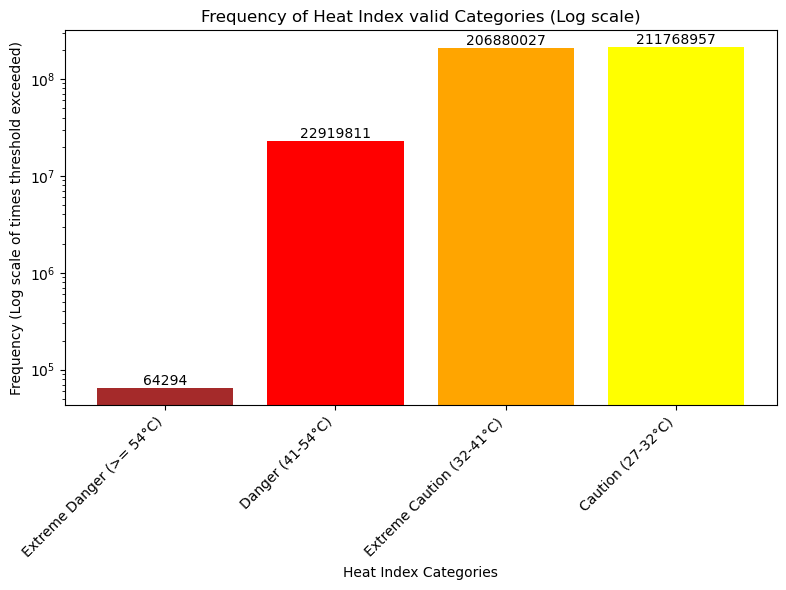

In [ ]:
# histograms
category_counts_HI = [extreme_danger_count_HI_3h, danger_count_HI_3h, extreme_caution_count_HI_3h, caution_count_HI_3h]
category_labels = ["Extreme Danger (>= 54°C)", "Danger (41-54°C)", "Extreme Caution (32-41°C)", "Caution (27-32°C)"]

# Plot the histogram with a logarithmic y-axis
plt.figure(figsize=(8, 6))
bars = plt.bar(category_labels, category_counts_HI, color=['brown', 'red', 'orange', 'yellow'])

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel("Heat Index Categories")
plt.ylabel("Frequency (Log scale of times threshold exceeded)")
plt.title("Frequency of Heat Index Categories (Log scale) 3h data")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the count on top of each bar
for bar in bars:
    # Get the height of the bar (which represents the count)
    height = bar.get_height()
    
    # Add the count on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

6.2.2 - T° Histogram 3h

In [45]:
extreme_danger_count_T_3h = T_extreme_danger_3h['t2m'].sum().values

In [46]:
danger_count_T_3h = T_danger_3h['t2m'].sum().values

In [49]:
extreme_caution_count_T_3h =T_extreme_caution_3h['t2m'].sum().values

In [50]:
caution_count_T_3h = T_caution_3h['t2m'].sum().values

In [51]:
print(extreme_danger_count_T_3h)
print(danger_count_T_3h)
print(extreme_caution_count_T_3h)
print(caution_count_T_3h)

0
8222514
131938687
272052445


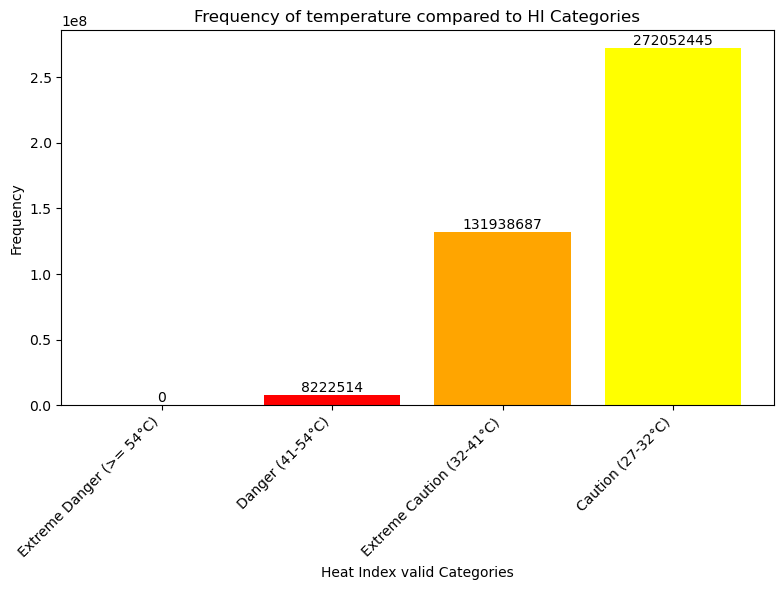

In [ ]:
# histograms
category_counts_T = [extreme_danger_count_T_3h, danger_count_T_3h, extreme_caution_count_T_3h, caution_count_T_3h]
category_labels = ["Extreme Danger (>= 54°C)", "Danger (41-54°C)", "Extreme Caution (32-41°C)", "Caution (27-32°C)"]

# Plot the histogram with a logarithmic y-axis
plt.figure(figsize=(8, 6))
bars = plt.bar(category_labels, category_counts_T, color=['brown', 'red', 'orange', 'yellow'])

# Add labels and title
plt.xlabel("Heat Index Categories")
plt.ylabel("Frequency")
plt.title("Frequency of temperature compared to HI Categories")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the count on top of each bar
for bar in bars:
    # Get the height of the bar (which represents the count)
    height = bar.get_height()
    
    # Add the count on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

---
6.3 - Histogram daily max

6.3.1 - HI histogram daily max

In [12]:
extreme_danger_count_HI_daily_max = HI_extreme_danger_daily_max['daily_max_HI'].sum().values

In [13]:
danger_count_HI_daily_max = HI_danger_daily_max['daily_max_HI'].sum().values

In [14]:
extreme_caution_count_HI_daily_max = HI_extreme_caution_daily_max['daily_max_HI'].sum().values

In [15]:
caution_count_HI_daily_max = HI_caution_daily_max['daily_max_HI'].sum().values

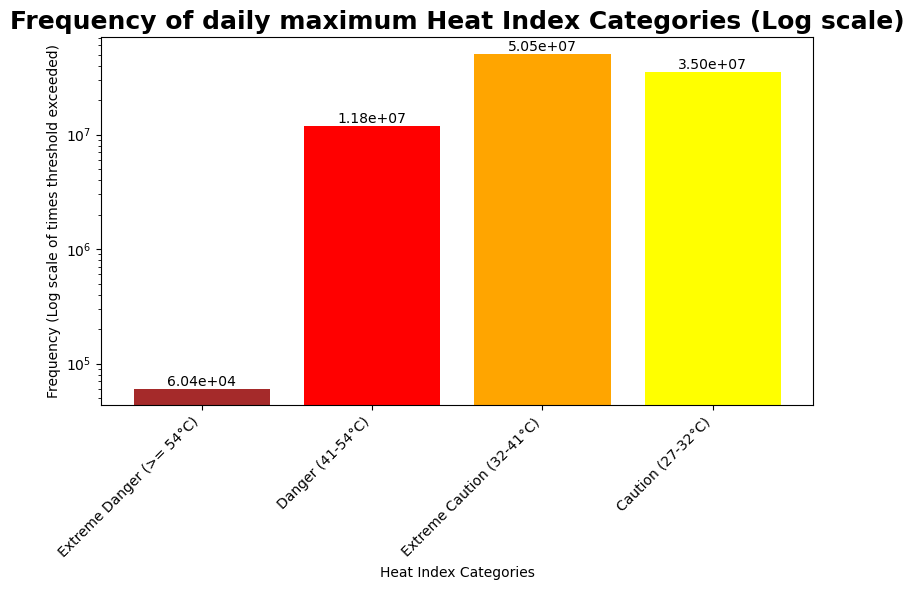

In [16]:
# histograms
category_counts_HI = [extreme_danger_count_HI_daily_max, danger_count_HI_daily_max, extreme_caution_count_HI_daily_max, caution_count_HI_daily_max]
category_labels = ["Extreme Danger (>= 54°C)", "Danger (41-54°C)", "Extreme Caution (32-41°C)", "Caution (27-32°C)"]

# Plot the histogram with a logarithmic y-axis
plt.figure(figsize=(8, 6))
bars = plt.bar(category_labels, category_counts_HI, color=['brown', 'red', 'orange', 'yellow'])

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel("Heat Index Categories")
plt.ylabel("Frequency (Log scale of times threshold exceeded)")
plt.title("Frequency of daily maximum Heat Index Categories (Log scale)", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the count on top of each bar
for bar in bars:
    # Get the height of the bar (which represents the count)
    height = bar.get_height()
    
    # Add the count on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2e}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

6.3.2 - T° histogram daily max

In [38]:
extreme_danger_count_T_daily_max = T_extreme_danger_daily_max['daily_max_temp'].sum().values

In [39]:
danger_count_T_daily_max = T_danger_daily_max['daily_max_temp'].sum().values

In [40]:
extreme_caution_count_T_daily_max = T_extreme_caution_daily_max['daily_max_temp'].sum().values

In [41]:
caution_count_T_daily_max = T_caution_daily_max['daily_max_temp'].sum().values

In [48]:
print(extreme_danger_count_T_daily_max)
print(danger_count_T_daily_max)
print(extreme_caution_count_T_daily_max)
print(caution_count_T_daily_max)

0
4729580
42650265
50086246


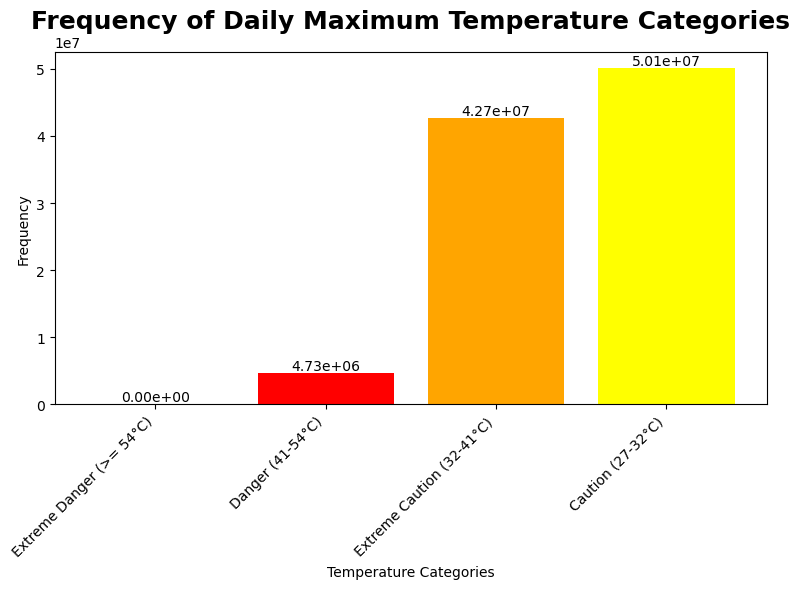

In [43]:
# histograms
category_counts_T = [extreme_danger_count_T_daily_max, danger_count_T_daily_max, extreme_caution_count_T_daily_max, caution_count_T_daily_max]
category_labels = ["Extreme Danger (>= 54°C)", "Danger (41-54°C)", "Extreme Caution (32-41°C)", "Caution (27-32°C)"]

# Plot the histogram with a logarithmic y-axis
plt.figure(figsize=(8, 6))
bars = plt.bar(category_labels, category_counts_T, color=['brown', 'red', 'orange', 'yellow'])

# Get current axis
ax = plt.gca()

# Set y-axis to scientific notation
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Add labels and title
plt.xlabel("Temperature Categories")
plt.ylabel("Frequency")
plt.title("Frequency of Daily Maximum Temperature Categories", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Add the count on top of each bar
for bar in bars:
    # Get the height of the bar (which represents the count)
    height = bar.get_height()
    
    # Add the count on top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2e}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

---
6.4 - Maximum consecutive days

In [17]:
# Maximum consecutive 1s function
def max_consecutive_ones(arr):
    # Convert to 1D NumPy array just in case
    arr = np.asarray(arr)
    # Find the run lengths of 1s
    max_count = count = 0
    for val in arr:
        if val == 1:
            count += 1
            max_count = max(max_count, count)
        else:
            count = 0
    return max_count

6.4.1 - HI consecutive days for each category

6.4.1.1 - HI Extreme Danger max consecutive days

In [25]:
# Apply the function along 'time' for each (lat, lon)
max_streak_HI_ED = xr.apply_ufunc(
    max_consecutive_ones,
    HI_extreme_danger_daily_max['daily_max_HI'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [26]:
max_streak_HI_ED.max()

<xarray.DataArray 'daily_max_HI' ()>
array(10)

6.4.1.2 - HI Danger max consecutive days

In [32]:
# Apply the function along 'time' for each (lat, lon)
max_streak_HI_D = xr.apply_ufunc(
    max_consecutive_ones,
    HI_danger_daily_max['daily_max_HI'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [33]:
max_streak_HI_D.max()

<xarray.DataArray 'daily_max_HI' ()>
array(117)

6.4.1.3 - HI Extreme caution max consecutive days

In [38]:
# Apply the function along 'time' for each (lat, lon)
max_streak_HI_EC = xr.apply_ufunc(
    max_consecutive_ones,
    HI_extreme_caution_daily_max['daily_max_HI'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [40]:
max_streak_HI_EC.max()

<xarray.DataArray 'daily_max_HI' ()>
array(181)

6.4.1.4 - HI caution max consecutive days

In [47]:
# Apply the function along 'time' for each (lat, lon)
max_streak_HI_C = xr.apply_ufunc(
    max_consecutive_ones,
    HI_caution_daily_max['daily_max_HI'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [48]:
max_streak_HI_C.max()

<xarray.DataArray 'daily_max_HI' ()>
array(128)

6.4.2 - T° consecutive days for each category

6.4.2.1 - T° Extreme Danger max consecutive days

In [55]:
# Apply the function along 'time' for each (lat, lon)
max_streak_T_ED = xr.apply_ufunc(
    max_consecutive_ones,
    T_extreme_danger_daily_max['daily_max_temp'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [56]:
max_streak_T_ED.max()

<xarray.DataArray 'daily_max_temp' ()>
array(0)

6.4.2.2 - T° Danger max consecutive days

In [57]:
# Apply the function along 'time' for each (lat, lon)
max_streak_T_D = xr.apply_ufunc(
    max_consecutive_ones,
    T_danger_daily_max['daily_max_temp'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [58]:
max_streak_T_D.max()

<xarray.DataArray 'daily_max_temp' ()>
array(71)

6.4.2.3 - T° Extreme Caution consecutive days

In [59]:
# Apply the function along 'time' for each (lat, lon)
max_streak_T_EC = xr.apply_ufunc(
    max_consecutive_ones,
    T_extreme_caution_daily_max['daily_max_temp'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [36]:
max_streak_T_EC.max()

<xarray.DataArray 'daily_max_temp' ()>
array(258)

6.4.2.4 - T° Caution consecutive days

In [60]:
# Apply the function along 'time' for each (lat, lon)
max_streak_T_C = xr.apply_ufunc(
    max_consecutive_ones,
    T_caution_daily_max['daily_max_temp'].sel(time=slice('2000-01-01', '2023-12-31')),
    input_core_dims=[['time']],
    vectorize=True,
    output_dtypes=[int]
)

In [38]:
max_streak_T_C.max()

<xarray.DataArray 'daily_max_temp' ()>
array(294)

---
6.5 - Representation in India for HI and T categories

6.5.1 - Representation in India HI 3h

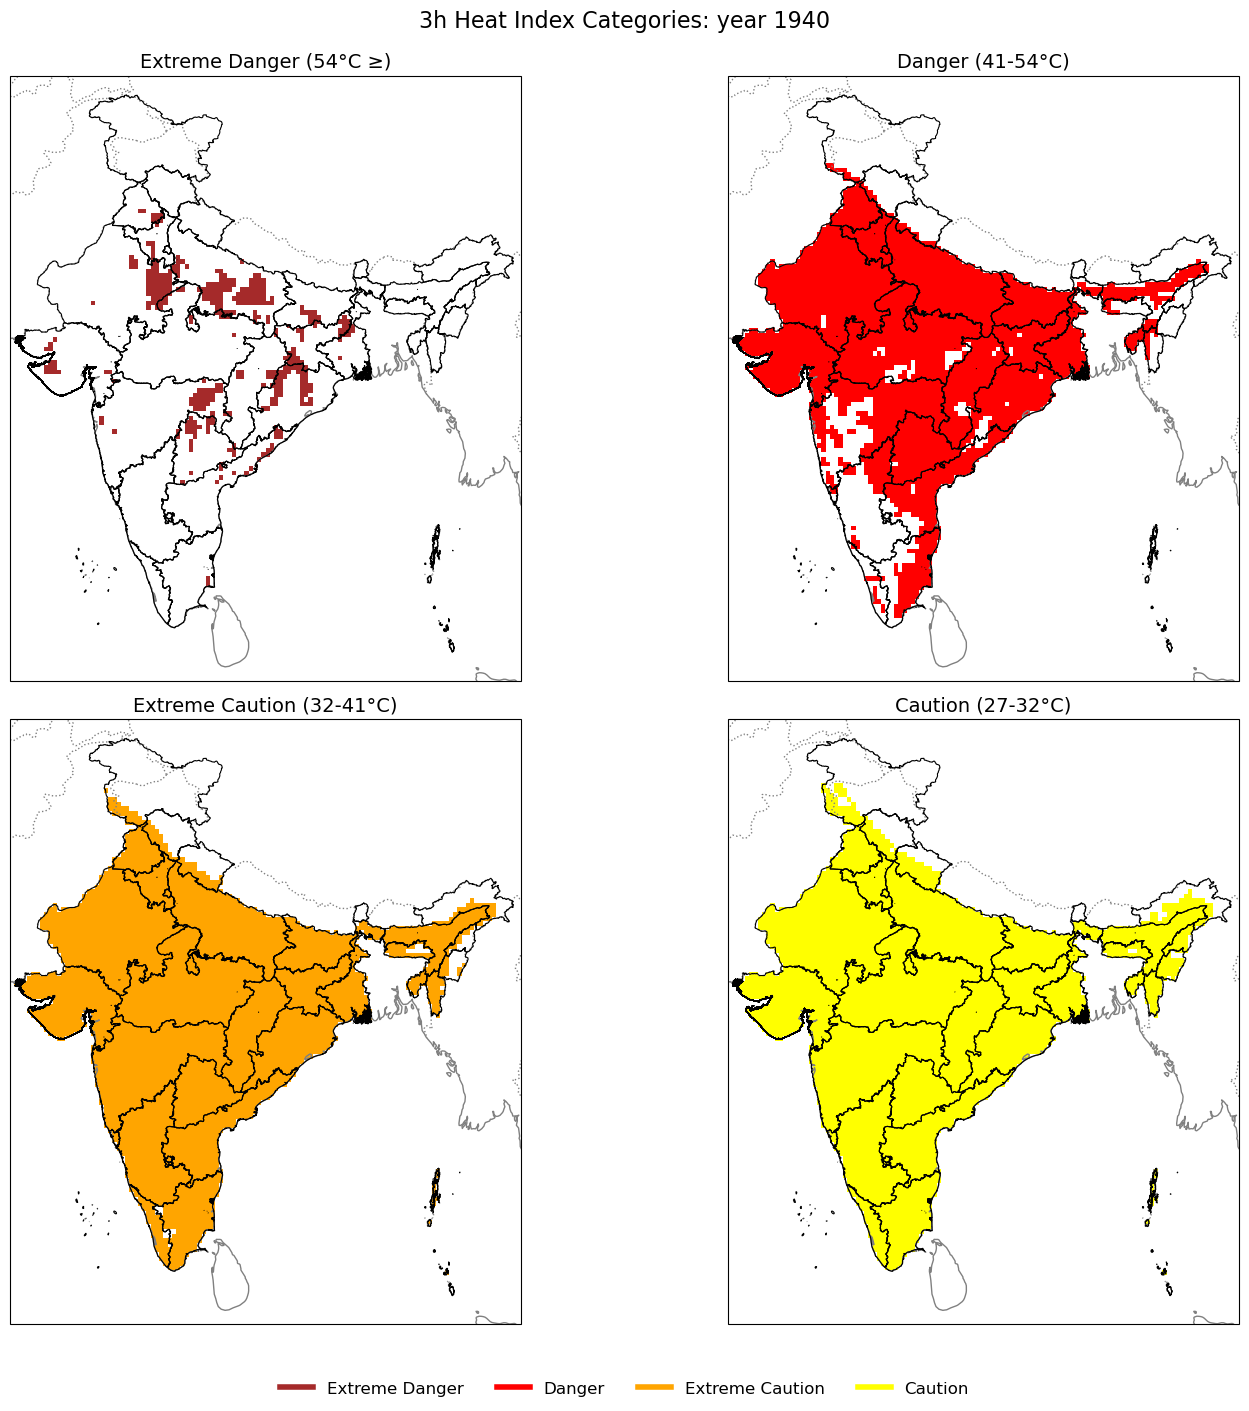

In [ ]:
# Reduce the data to 2D for each category --> exemple 1940
extreme_danger_2d = HI_extreme_danger_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
danger_2d = HI_danger_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
extreme_caution_2d = HI_extreme_caution_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
caution_2d = HI_caution_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": extreme_danger_2d, "color": "brown", "title": "Extreme Danger (54°C ≥)"},
    {"data": danger_2d, "color": "red", "title": "Danger (41-54°C)"},
    {"data": extreme_caution_2d, "color": "orange", "title": "Extreme Caution (32-41°C)"},
    {"data": caution_2d, "color": "yellow", "title": "Caution (27-32°C)"}
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_extreme_danger_3h['longitude'], HI_extreme_danger_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Add a common legend for all subplots
handles = [
    plt.Line2D([0], [0], color='brown', lw=4, label='Extreme Danger'),
    plt.Line2D([0], [0], color='red', lw=4, label='Danger'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Extreme Caution'),
    plt.Line2D([0], [0], color='yellow', lw=4, label='Caution')
]
fig.legend(handles=handles, loc='lower center', ncol=4, fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Leave space for the legend
plt.suptitle("3h Heat Index Categories: year 1940", fontsize=16, y=1)
plt.show()


6.5.2 - Representation in India T° 3h

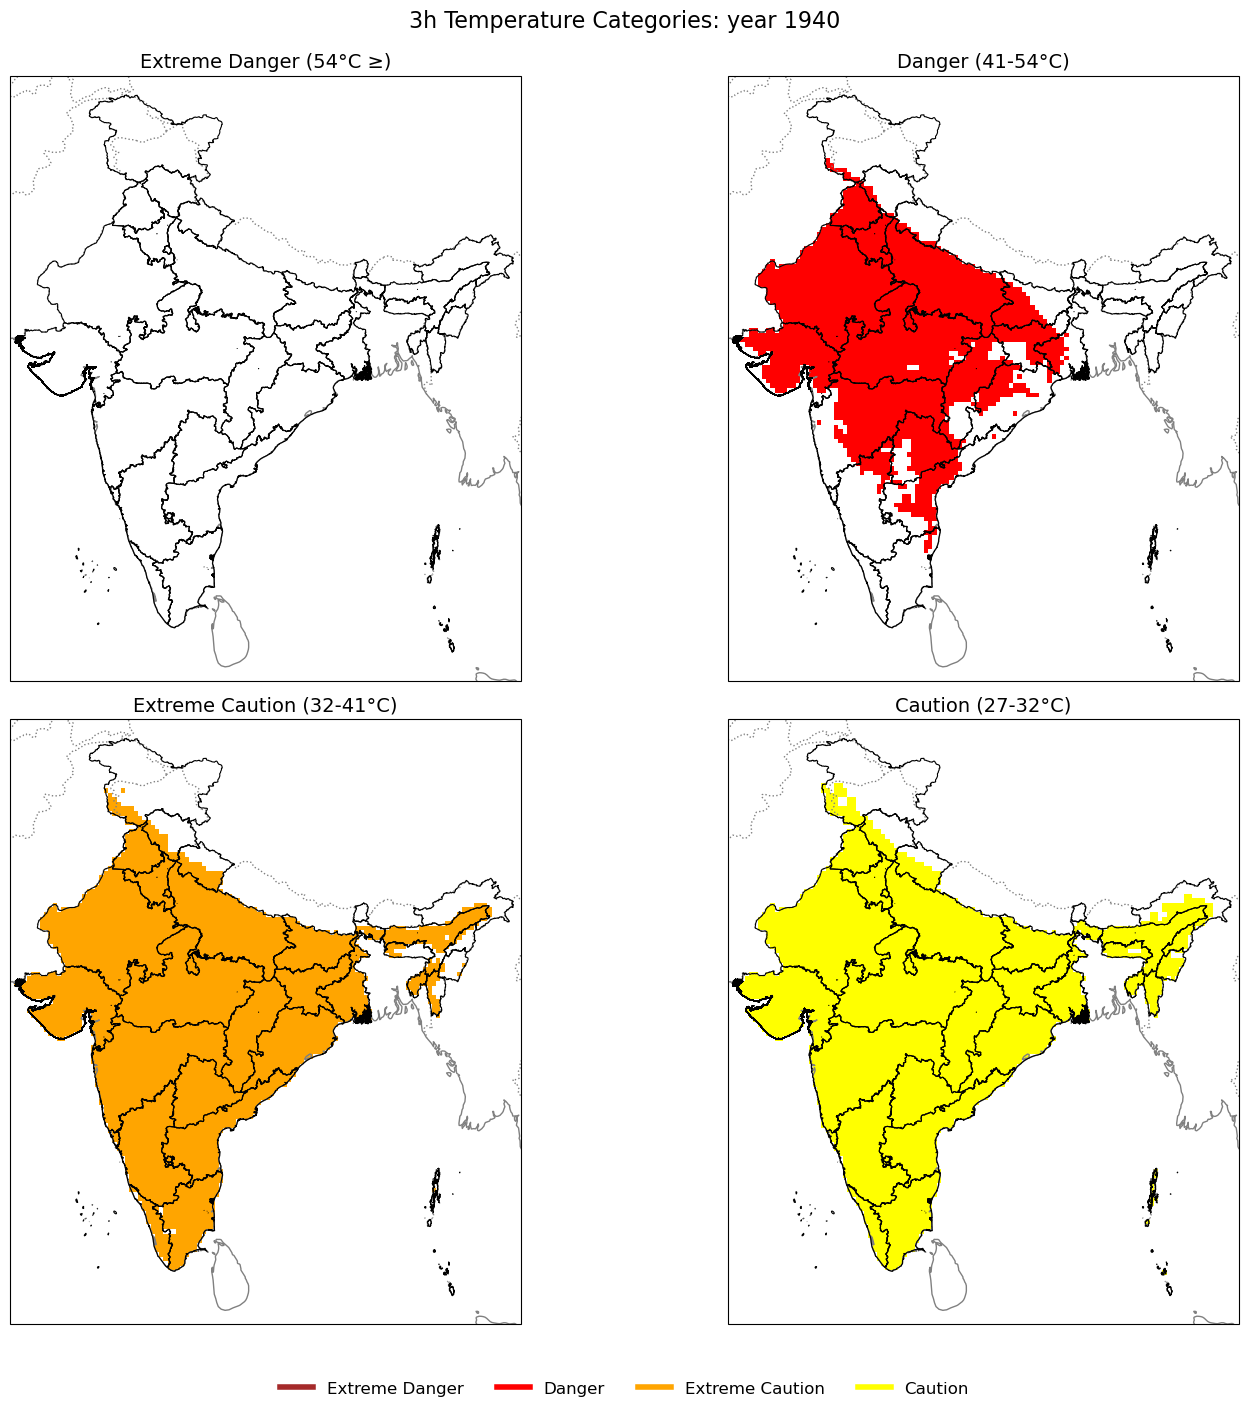

In [ ]:
# Reduce the data to 2D for each category --> exemple 1940
extreme_danger_2d = T_extreme_danger_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
danger_2d = T_danger_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
extreme_caution_2d = T_extreme_caution_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
caution_2d = T_caution_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": extreme_danger_2d, "color": "brown", "title": "Extreme Danger (54°C ≥)"},
    {"data": danger_2d, "color": "red", "title": "Danger (41-54°C)"},
    {"data": extreme_caution_2d, "color": "orange", "title": "Extreme Caution (32-41°C)"},
    {"data": caution_2d, "color": "yellow", "title": "Caution (27-32°C)"}
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(T_extreme_danger_3h['longitude'], T_extreme_danger_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Add a common legend for all subplots
handles = [
    plt.Line2D([0], [0], color='brown', lw=4, label='Extreme Danger'),
    plt.Line2D([0], [0], color='red', lw=4, label='Danger'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Extreme Caution'),
    plt.Line2D([0], [0], color='yellow', lw=4, label='Caution')
]
fig.legend(handles=handles, loc='lower center', ncol=4, fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Leave space for the legend
plt.suptitle("3h Temperature Categories: year 1940", fontsize=16, y=1)
plt.show()


6.5.3 - Representation in India HI daily max

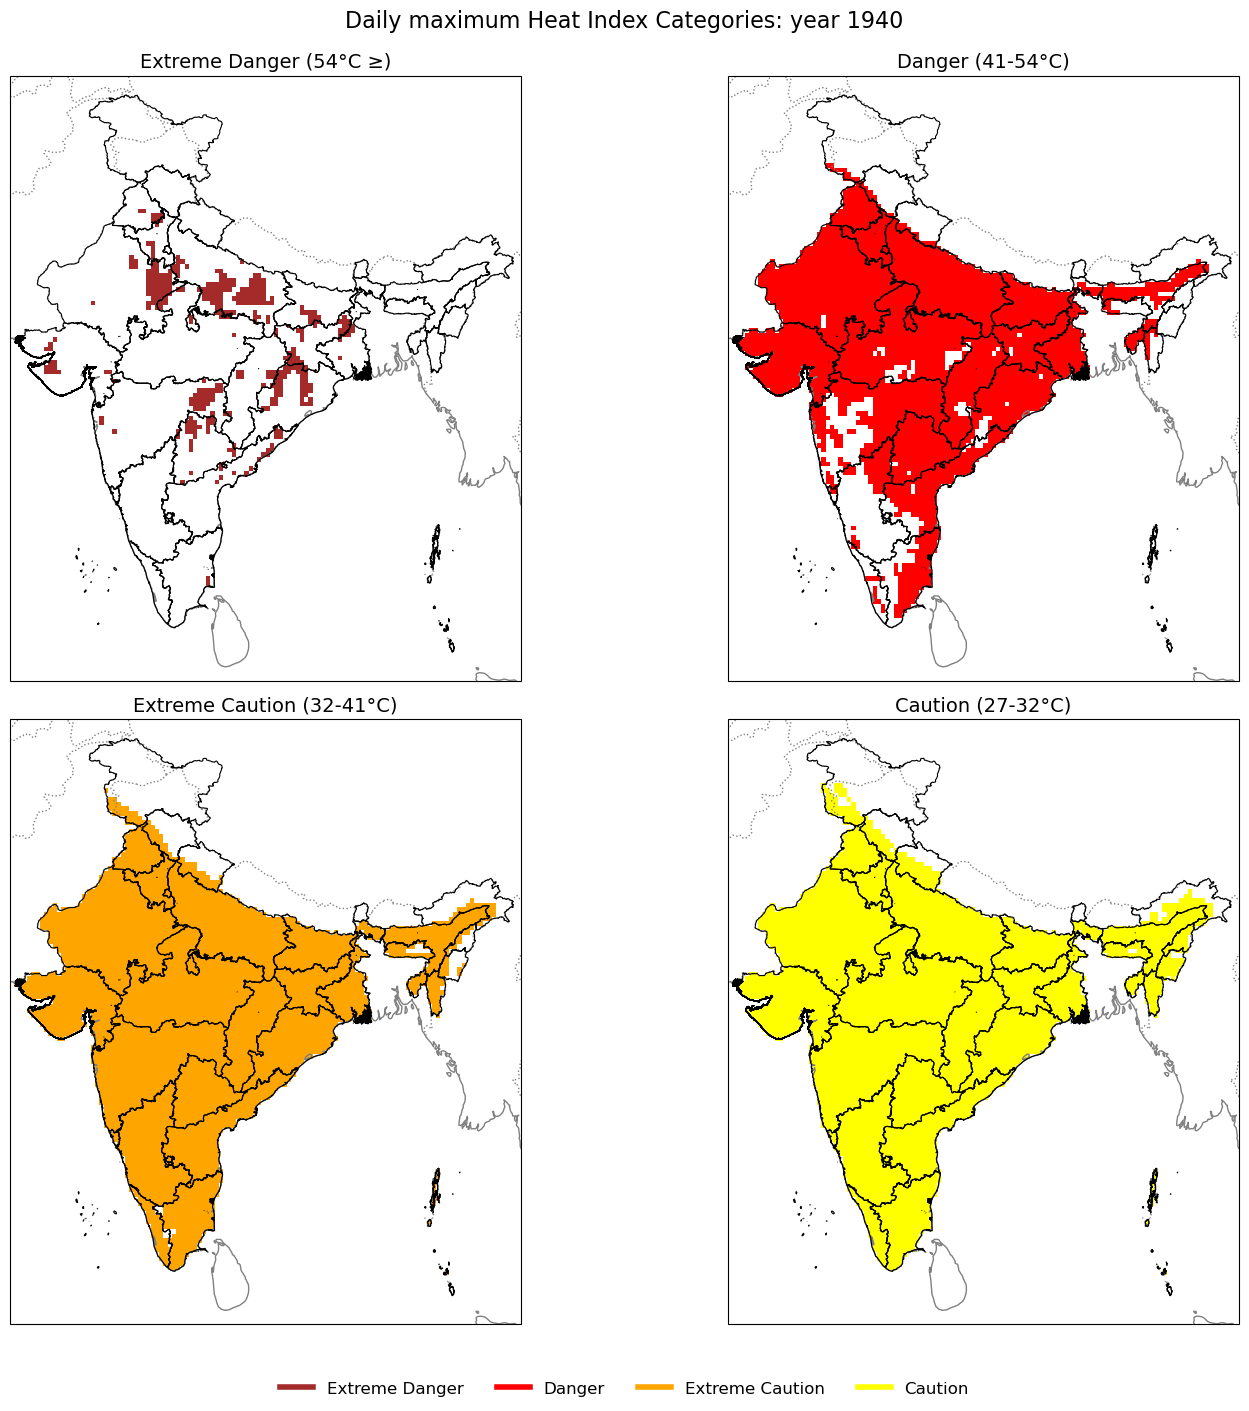

In [ ]:
# Reduce the data to 2D for each category --> exemple 1940
extreme_danger_2d = HI_extreme_danger_daily_max['daily_max_HI'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
danger_2d = HI_danger_daily_max['daily_max_HI'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
extreme_caution_2d = HI_extreme_caution_daily_max['daily_max_HI'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
caution_2d = HI_caution_daily_max['daily_max_HI'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": extreme_danger_2d, "color": "brown", "title": "Extreme Danger (54°C ≥)"},
    {"data": danger_2d, "color": "red", "title": "Danger (41-54°C)"},
    {"data": extreme_caution_2d, "color": "orange", "title": "Extreme Caution (32-41°C)"},
    {"data": caution_2d, "color": "yellow", "title": "Caution (27-32°C)"}
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_extreme_danger_daily_max['longitude'], HI_extreme_danger_daily_max['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Add a common legend for all subplots
handles = [
    plt.Line2D([0], [0], color='brown', lw=4, label='Extreme Danger'),
    plt.Line2D([0], [0], color='red', lw=4, label='Danger'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Extreme Caution'),
    plt.Line2D([0], [0], color='yellow', lw=4, label='Caution')
]
fig.legend(handles=handles, loc='lower center', ncol=4, fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Leave space for the legend
plt.suptitle("Daily maximum Heat Index Categories: year 1940", fontsize=16, y=1)
plt.show()


6.5.4 - Representation in India T° daily max

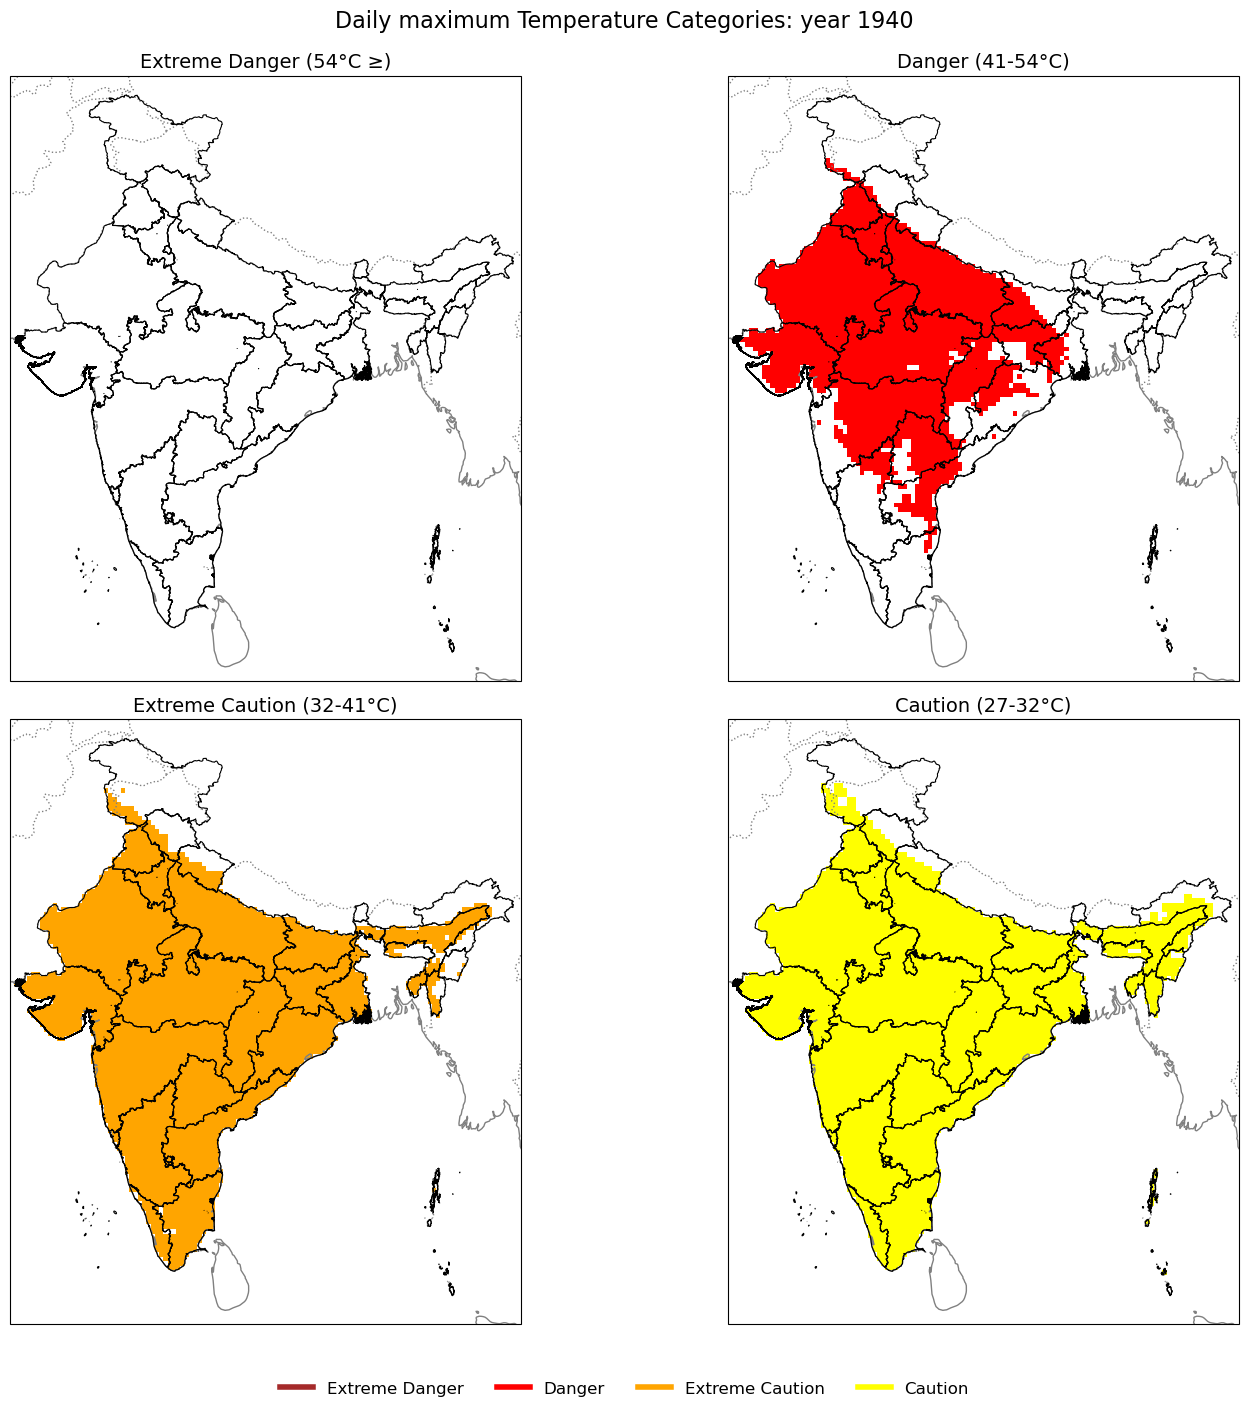

In [ ]:
# Reduce the data to 2D for each category --> exemple 1940
extreme_danger_2d = T_extreme_danger_daily_max['daily_max_temp'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
danger_2d = T_danger_daily_max['daily_max_temp'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
extreme_caution_2d = T_extreme_caution_daily_max['daily_max_temp'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
caution_2d = T_caution_daily_max['daily_max_temp'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": extreme_danger_2d, "color": "brown", "title": "Extreme Danger (54°C ≥)"},
    {"data": danger_2d, "color": "red", "title": "Danger (41-54°C)"},
    {"data": extreme_caution_2d, "color": "orange", "title": "Extreme Caution (32-41°C)"},
    {"data": caution_2d, "color": "yellow", "title": "Caution (27-32°C)"}
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(T_extreme_danger_daily_max['longitude'], T_extreme_danger_daily_max['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Add a common legend for all subplots
handles = [
    plt.Line2D([0], [0], color='brown', lw=4, label='Extreme Danger'),
    plt.Line2D([0], [0], color='red', lw=4, label='Danger'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Extreme Caution'),
    plt.Line2D([0], [0], color='yellow', lw=4, label='Caution')
]
fig.legend(handles=handles, loc='lower center', ncol=4, fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Leave space for the legend
plt.suptitle("Daily maximum Temperature Categories: year 1940", fontsize=16, y=1)
plt.show()


---
6.6 - HI vs T° 3h

6.6.1 - Extreme Danger HI° vs T°

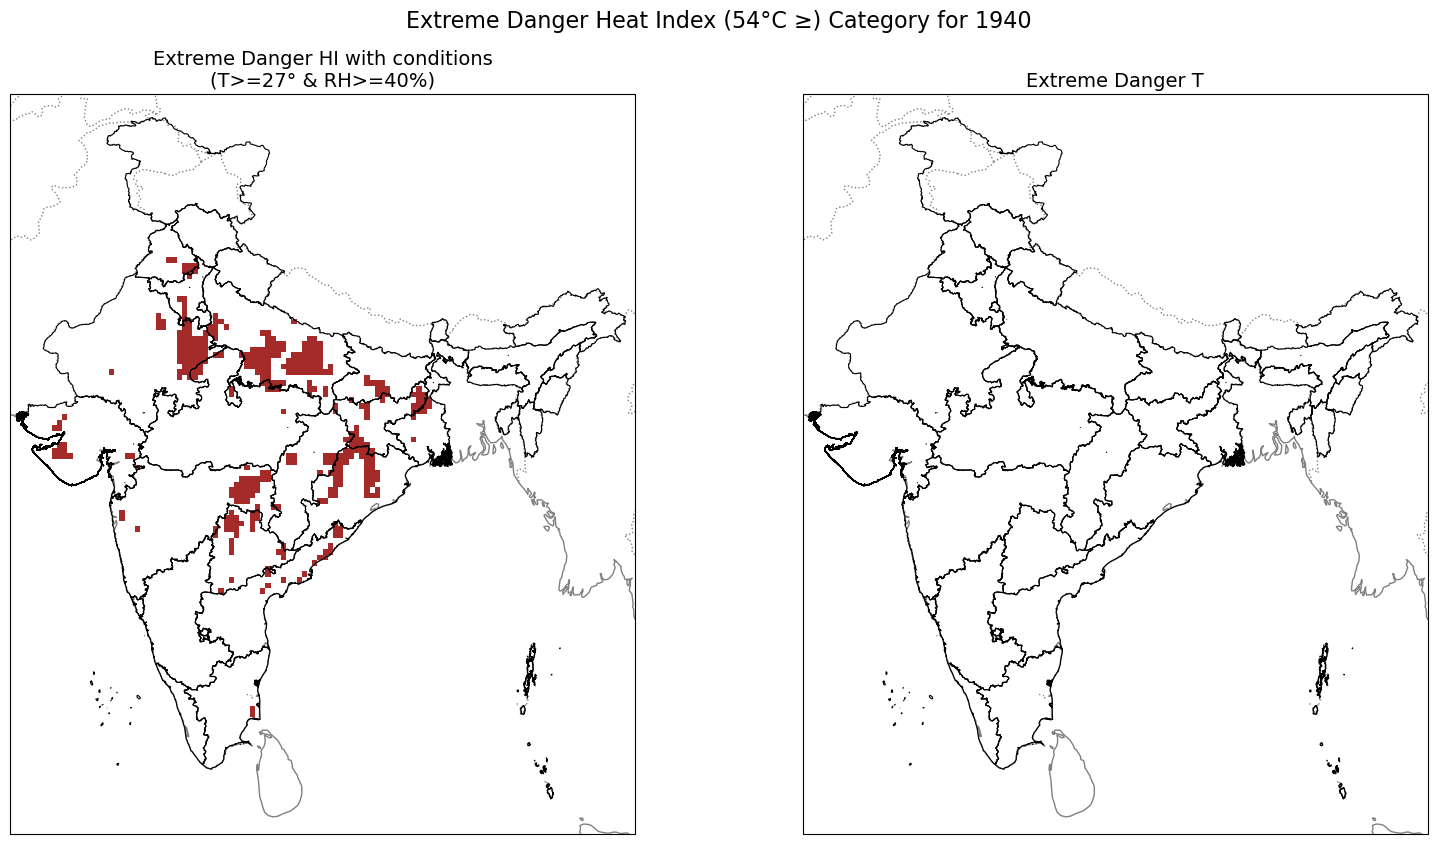

In [ ]:
# Reduce the data to 2D for Extreme danger
HI_extreme_danger_2d = HI_extreme_danger_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
T_extreme_danger_2d = T_extreme_danger_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": HI_extreme_danger_2d, "color": "brown", "title": "Extreme Danger HI with conditions\n(T>=27° & RH>=40%)"},
    {"data": T_extreme_danger_2d, "color": "brown", "title": "Extreme Danger T"},
]

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot Extreme danger
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_extreme_danger_3h['longitude'], HI_extreme_danger_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.4, 1, 0.95])  # Leave space for the legend
plt.suptitle("Extreme Danger Heat Index (54°C ≥) Category for 1940", fontsize=16, y=1)
plt.show()

6.6.2 - Danger HI° vs T°

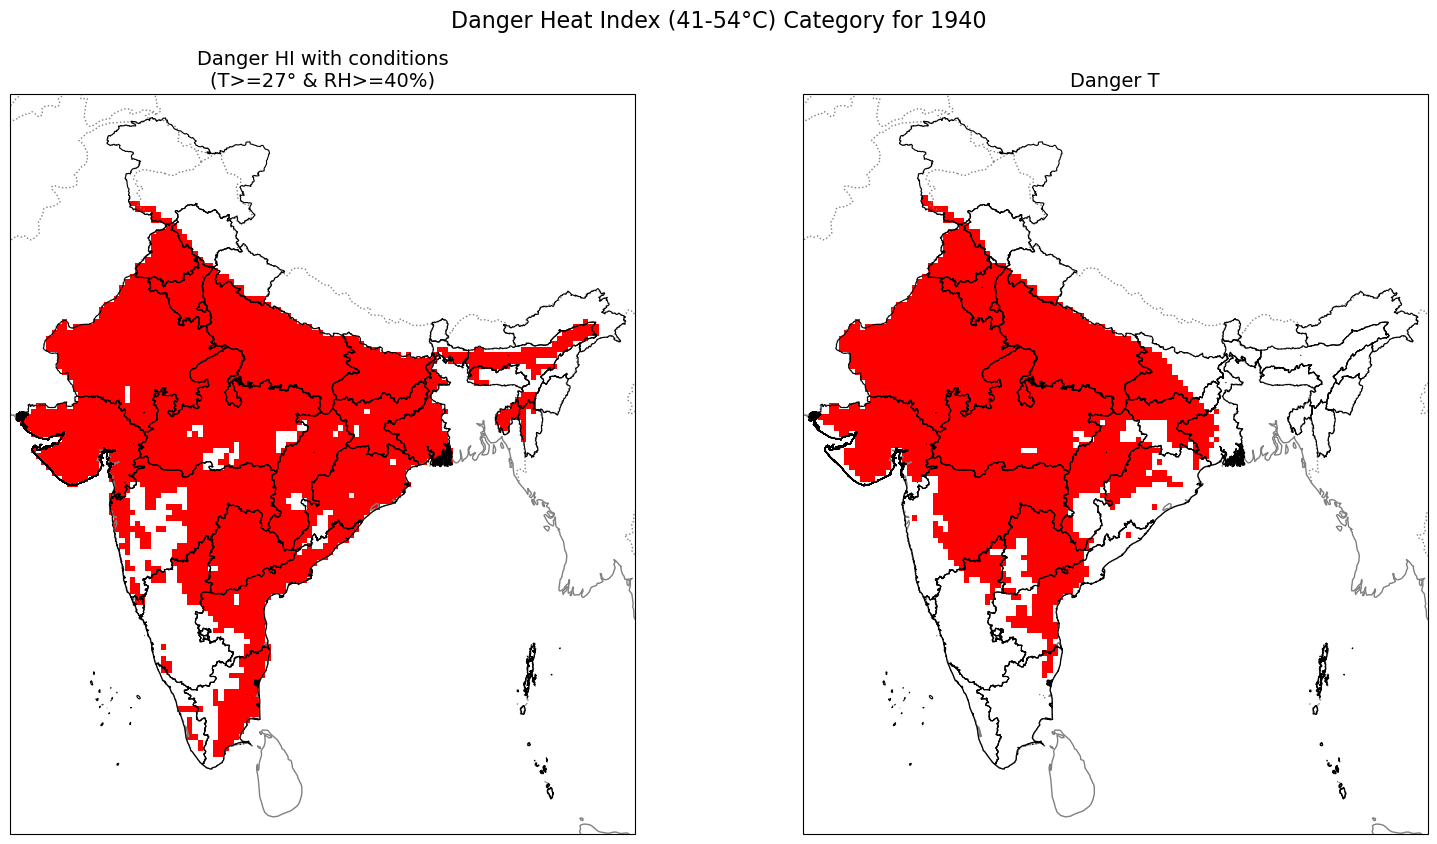

In [ ]:
# Reduce the data to 2D for Danger catedory
HI_danger_2d = HI_danger_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
T_danger_2d = T_danger_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": HI_danger_2d, "color": "red", "title": "Danger HI with conditions\n(T>=27° & RH>=40%)"},
    {"data": T_danger_2d, "color": "red", "title": "Danger T"},
]

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot Danger category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_danger_3h['longitude'], HI_danger_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.4, 1, 0.95])  # Leave space for the legend
plt.suptitle("Danger Heat Index (41-54°C) Category for 1940", fontsize=16, y=1)
plt.show()

6.6.3 - Extreme caution HI° vs T°

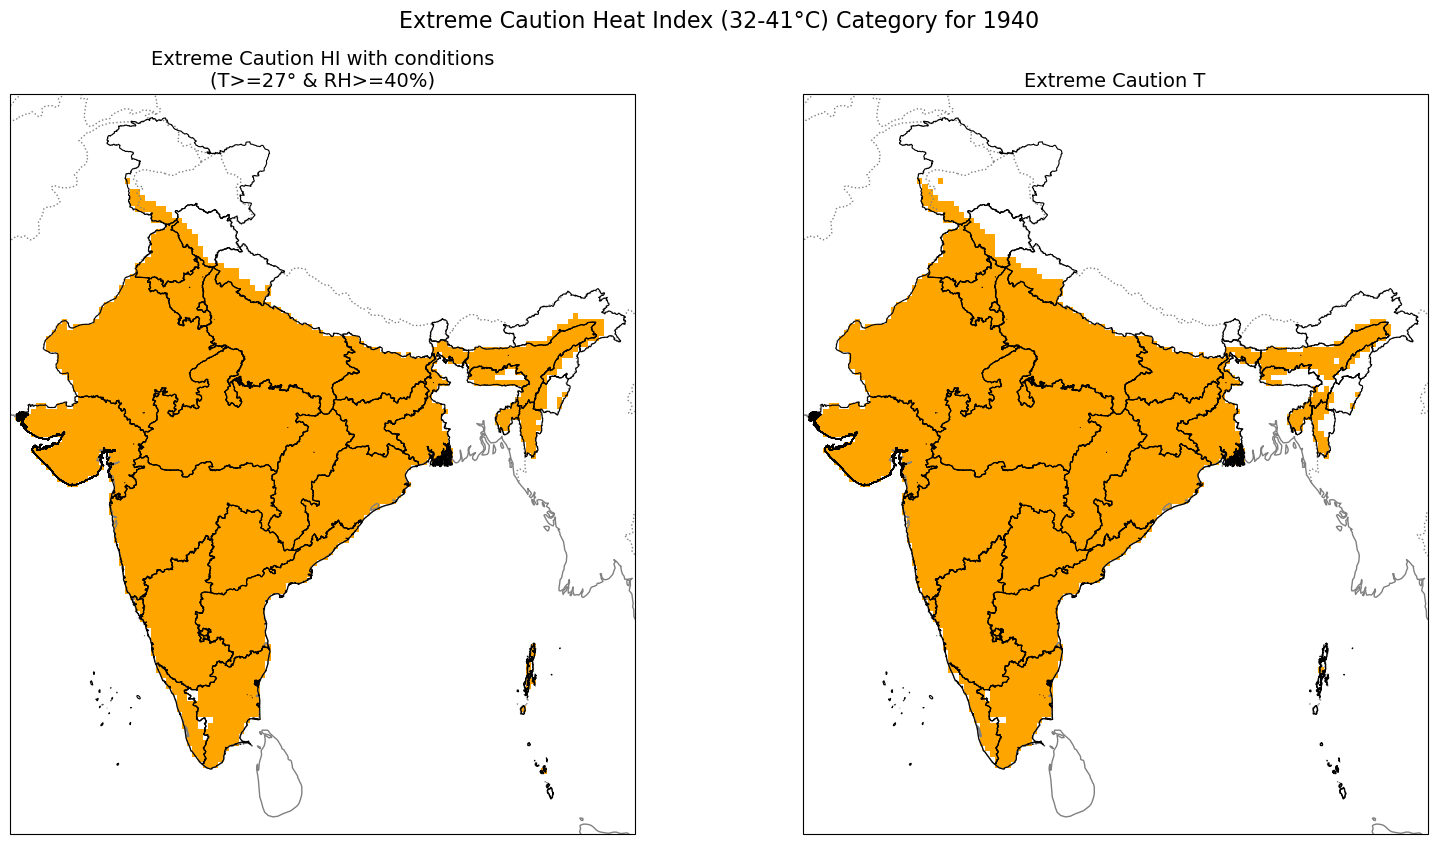

In [65]:
# Reduce the data to 2D for Extreme caution category
HI_extreme_caution_2d = HI_extreme_caution_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
T_extreme_caution_2d = T_extreme_caution_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": HI_extreme_caution_2d, "color": "orange", "title": "Extreme Caution HI with conditions\n(T>=27° & RH>=40%)"},
    {"data": T_extreme_caution_2d, "color": "orange", "title": "Extreme Caution T"},
]

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot Extreme caution category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_danger_3h['longitude'], HI_danger_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.4, 1, 0.95])  # Leave space for the legend
plt.suptitle("Extreme Caution Heat Index (32-41°C) Category for 1940", fontsize=16, y=1)
plt.show()

6.6.4 - Caution H° vs T°

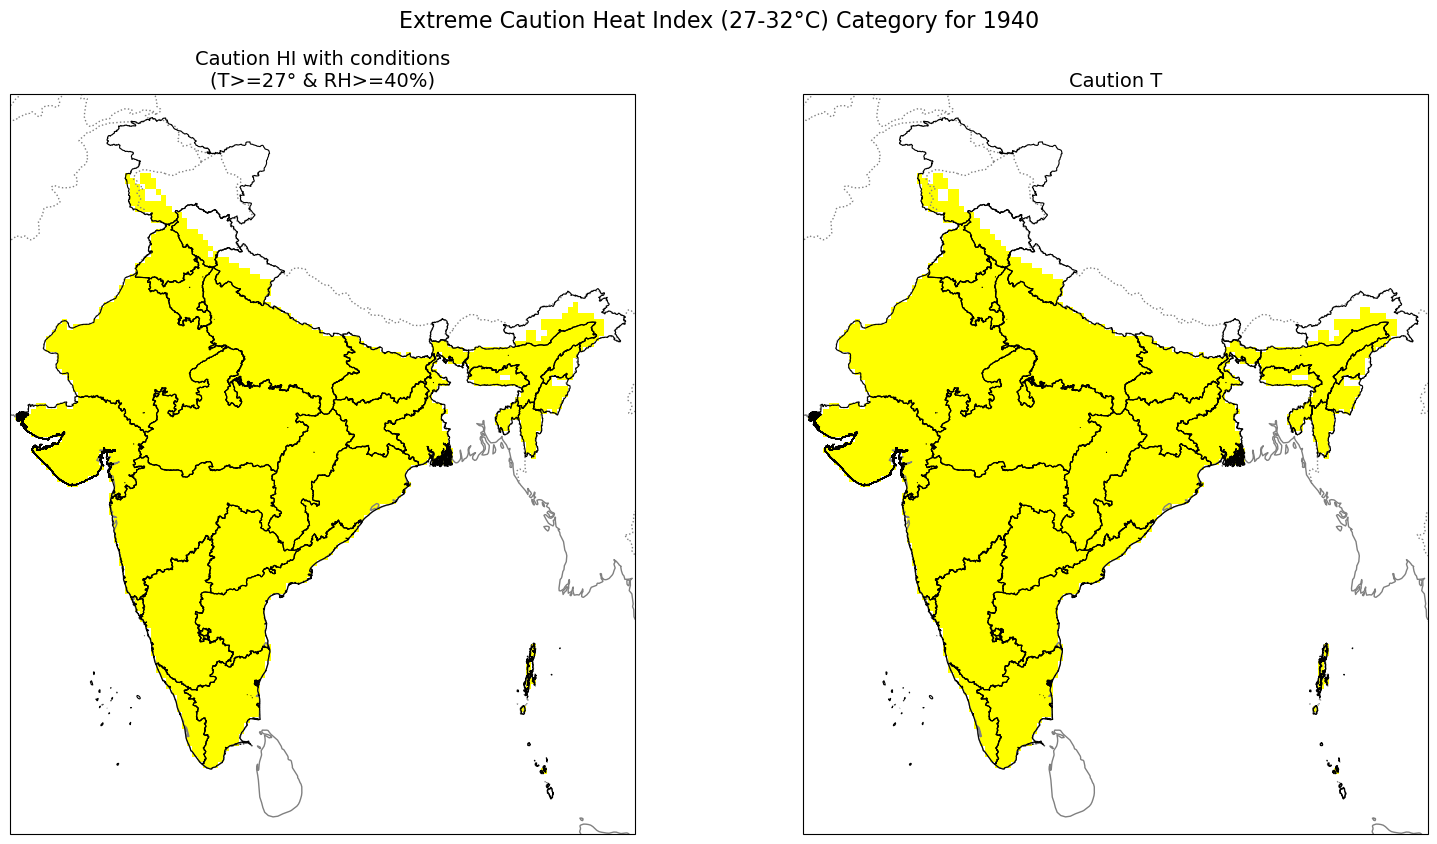

In [ ]:
# Reduce the data to 2D for Caution category
HI_caution_2d = HI_caution_3h['heat_index'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')
T_caution_2d = T_caution_3h['t2m'].sel(time=slice('1940-01-01', '1940-12-31')).max(dim='time')

# Prepare data for plotting
categories = [
    {"data": HI_caution_2d, "color": "yellow", "title": "Caution HI with conditions\n(T>=27° & RH>=40%)"},
    {"data": T_caution_2d, "color": "yellow", "title": "Caution T"},
]

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot caution category
for ax, category in zip(axes, categories):
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='white')

    # Add Indian states boundaries
    Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

    # Create the colormap
    cmap = ListedColormap(['white', category["color"]])

    # Plot the binary data
    img = ax.pcolormesh(HI_caution_3h['longitude'], HI_caution_3h['latitude'], category["data"],
                        cmap=cmap, transform=ccrs.PlateCarree())

    # Title for each subplot
    ax.set_title(category["title"], fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.4, 1, 0.95])  # Leave space for the legend
plt.suptitle("Extreme Caution Heat Index (27-32°C) Category for 1940", fontsize=16, y=1)
plt.show()

---
6.7 - Frequency/intensity

6.7.1 - HI category daily maximum frequency/intensity

In [50]:
def count_heatwave_events(data, min_streak, threshold=1):
    """
    Count number of heatwave *events* per grid cell.
    A heatwave event is a run of 1s (above threshold) lasting at least `min_streak` days.
    """
    binary = (data >= threshold).astype(int)

    def count_events(arr):
        count = 0
        streak = 0
        for val in arr:
            if val:
                streak += 1
            else:
                if streak >= min_streak:
                    count += 1
                streak = 0
        # Handle streak at the end
        if streak >= min_streak:
            count += 1
        return count

    # Apply across all grid cells (time is axis 0)
    event_counts = np.apply_along_axis(count_events, axis=0, arr=binary.values)

    return event_counts

6.7.1.1 - Extreme danger intensity

In [ ]:
# Select the specific period
selected_period = HI_extreme_danger_daily_max.sel(time=slice('1970-01-01', '1999-12-31'))

# Extract data for a specific streak length (5-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

1


22


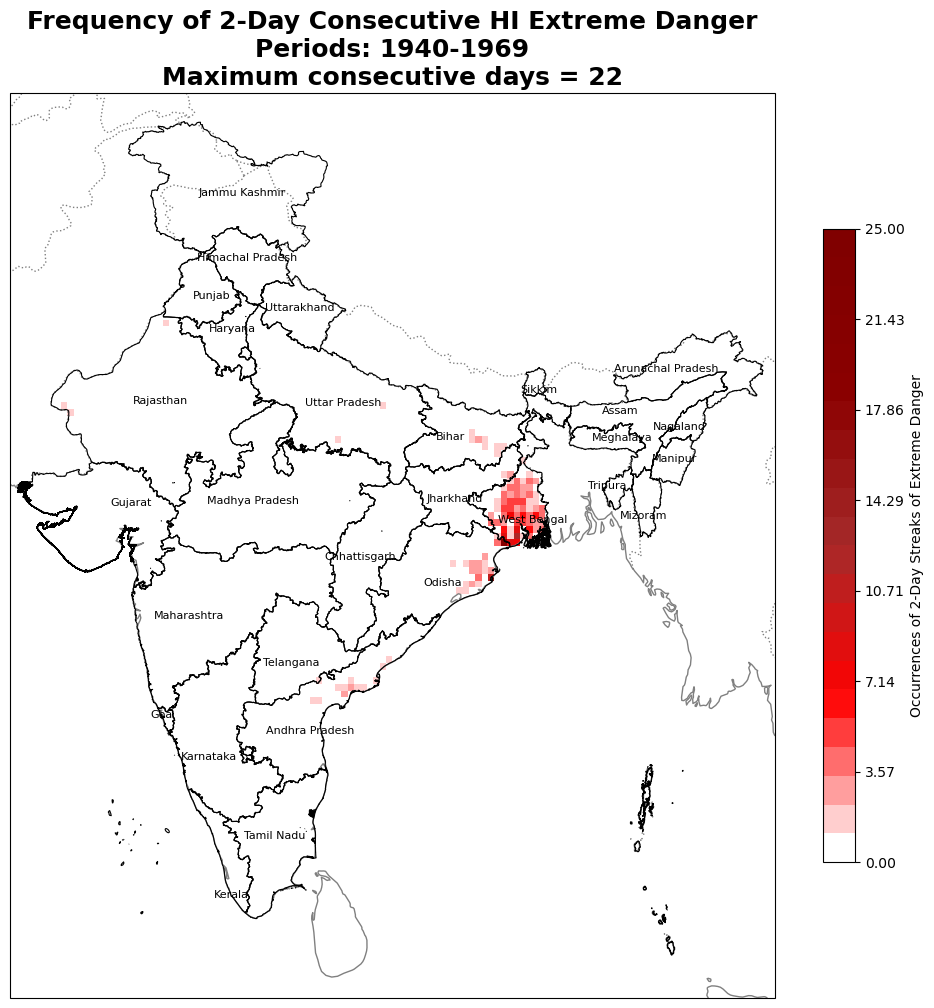

In [ ]:
# Select the specific period 
selected_period = HI_extreme_danger_daily_max.sel(time=slice('1940-01-01', '1969-12-31'))

# Extract data for a specific streak length (5-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Define colormap
colors = ["white", "r", "brown", "darkred", "maroon"] # Gradient from white to brown
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=25)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Danger")
cbar.set_ticks(np.linspace(0, 25, num=8))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Extreme Danger\nPeriods: 1940-1969\nMaximum consecutive days = {streak_days_ED.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.1.2 - Danger intensity

In [67]:
# Select the specific period
selected_period = (HI_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) | HI_extreme_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')))

# Extract data for a specific streak length (5-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

512


362


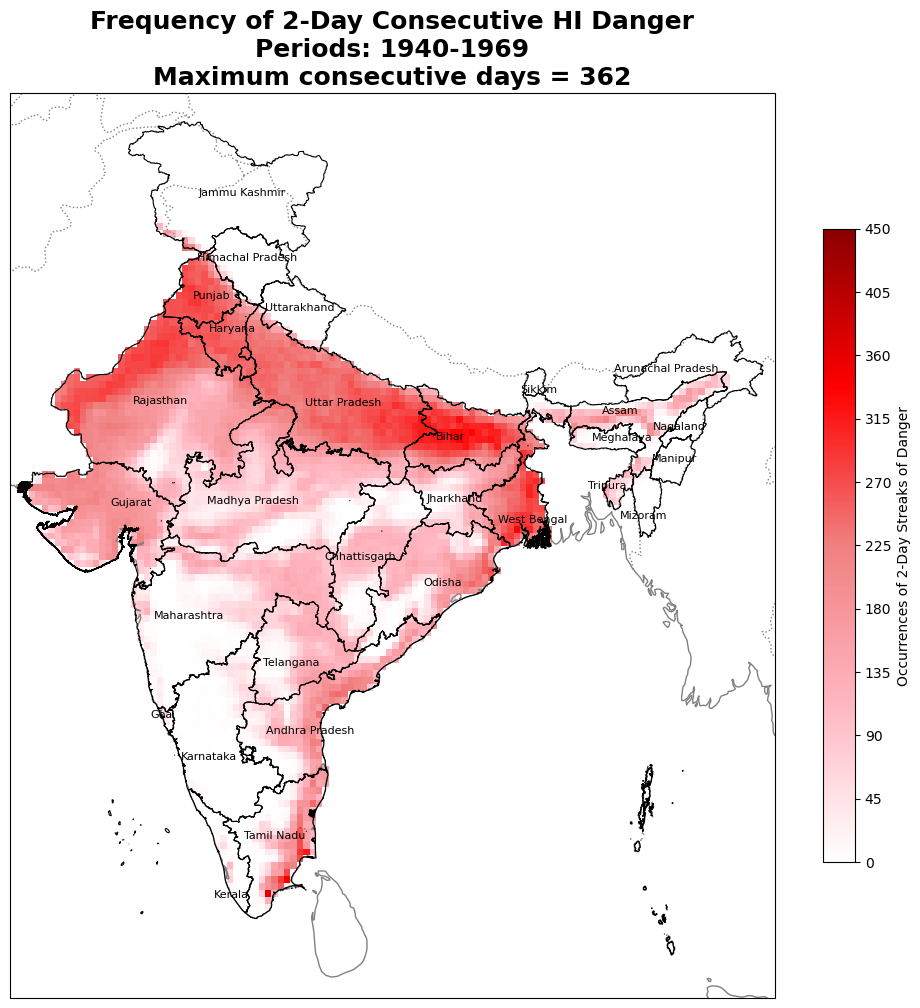

In [ ]:
# Select the specific period
selected_period = HI_danger_daily_max.sel(time=slice('1940-01-01', '1969-12-31')) 

# Extract data for a specific streak length (2-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Define colormap
colors = ["white", "lightpink", "lightcoral", "red", "darkred"]  # Gradient from white to red
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=450)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Danger")
cbar.set_ticks(np.linspace(0, 450, num=11))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Danger\nPeriods: 1940-1969\nMaximum consecutive days = {streak_days.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.1.3 - Extreme Caution intensity

In [76]:
# Select the specific period
selected_period = (HI_extreme_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) |
                    HI_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) | 
                     HI_extreme_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')))

# Extract data for a specific streak length (e.g., 5-day streaks)
streak_length = 2
streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

639


879


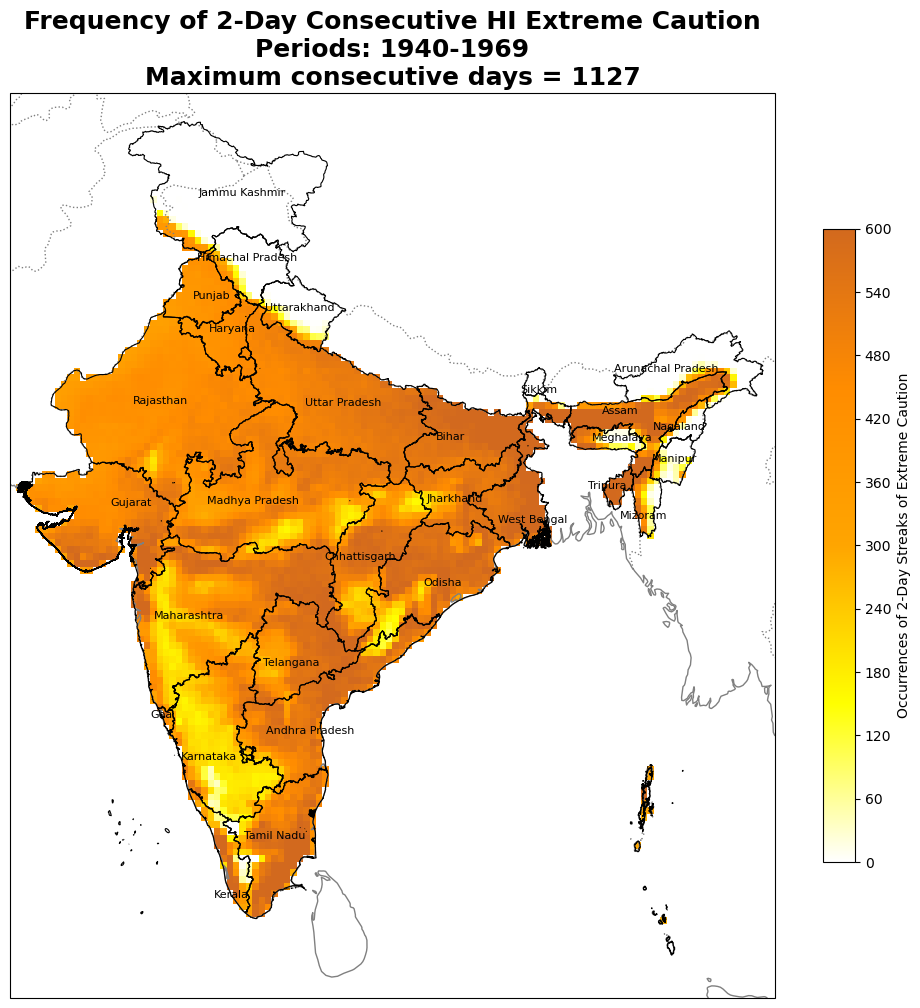

In [ ]:
# Select the specific period
selected_period = HI_extreme_caution_daily_max.sel(time=slice('1940-01-01', '1969-12-31'))
                  

# Extract data for a specific streak length (e.g., 5-day streaks)
streak_length = 2
streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme caution, 0 = Not Extreme Caution)
)

print(streak_days.max())

# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)
    
# Define colormap
colors = ["white", "yellow", "orange", "darkorange", "chocolate"]  # Gradient from white to orange
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=600)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Caution")
cbar.set_ticks(np.linspace(0, 600, num=11))


# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Extreme Caution\nPeriods: 1940-1969\nMaximum consecutive days = {(streak_days).max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.1.4 - Caution intensity

In [83]:
# Select the specific period
selected_period = (HI_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) |
                    HI_extreme_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) |
                    HI_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')) | 
                     HI_extreme_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31')))

# Extract data for a specific streak length (e.g., 2-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

601


856


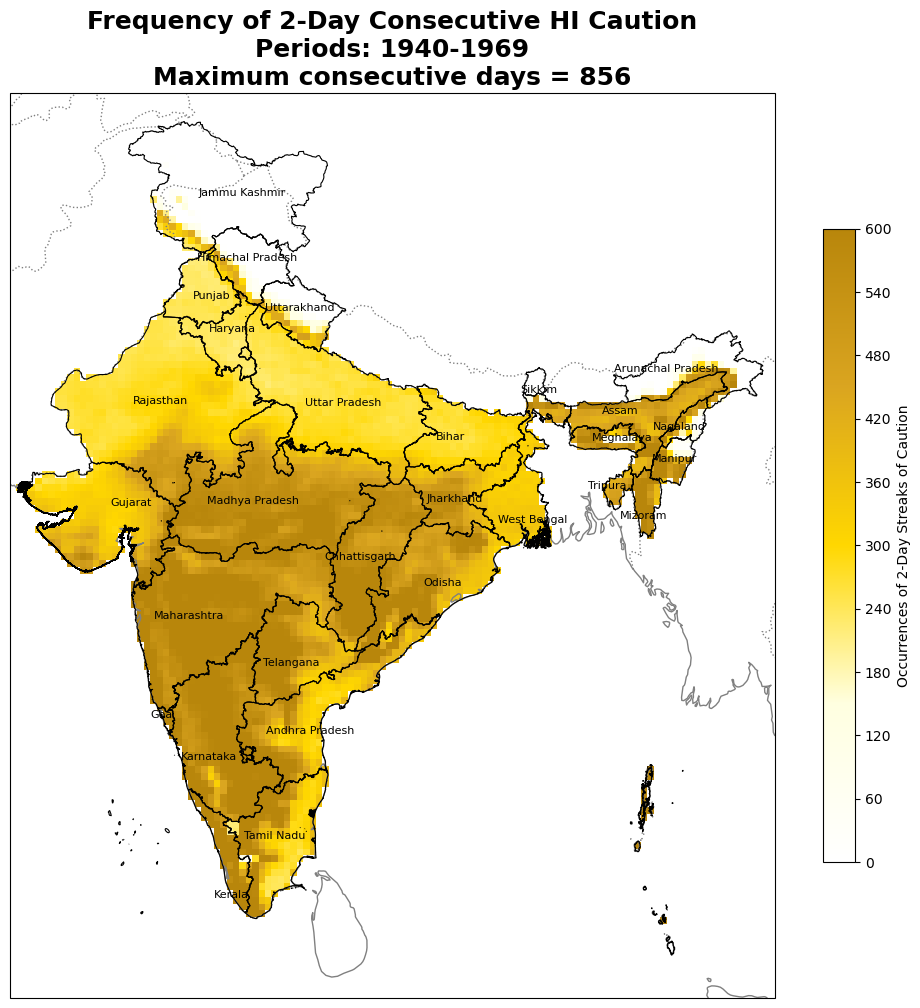

In [161]:
# Select the specific period
selected_period = HI_caution_daily_max.sel(time=slice('1940-01-01', '1969-12-31')) 

# Extract data for a specific streak length (e.g., 2-day streaks)
streak_length = 2

streak_days = count_heatwave_events(
    selected_period['daily_max_HI'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_days.max())

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)
    
# Define colormap
colors = ["white", "lightyellow", "gold", "goldenrod", "darkgoldenrod"]  # Gradient from white to yellow
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=600)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Caution")
cbar.set_ticks(np.linspace(0, 600, num=11))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Caution\nPeriods: 1940-1969\nMaximum consecutive days = {streak_days.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.1.5 - Cumulated classes

In [190]:
# First count streaks for each category separately
streak_days_C = count_heatwave_events(
    HI_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))['daily_max_HI'],
    min_streak=streak_length,
    threshold=1
)

streak_days_EC = count_heatwave_events(
    HI_extreme_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))['daily_max_HI'],
    min_streak=streak_length,
    threshold=1
)

streak_days_D = count_heatwave_events(
    HI_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))['daily_max_HI'],
    min_streak=streak_length,
    threshold=1
)

streak_days_ED = count_heatwave_events(
    HI_extreme_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))['daily_max_HI'],
    min_streak=streak_length,
    threshold=1
)


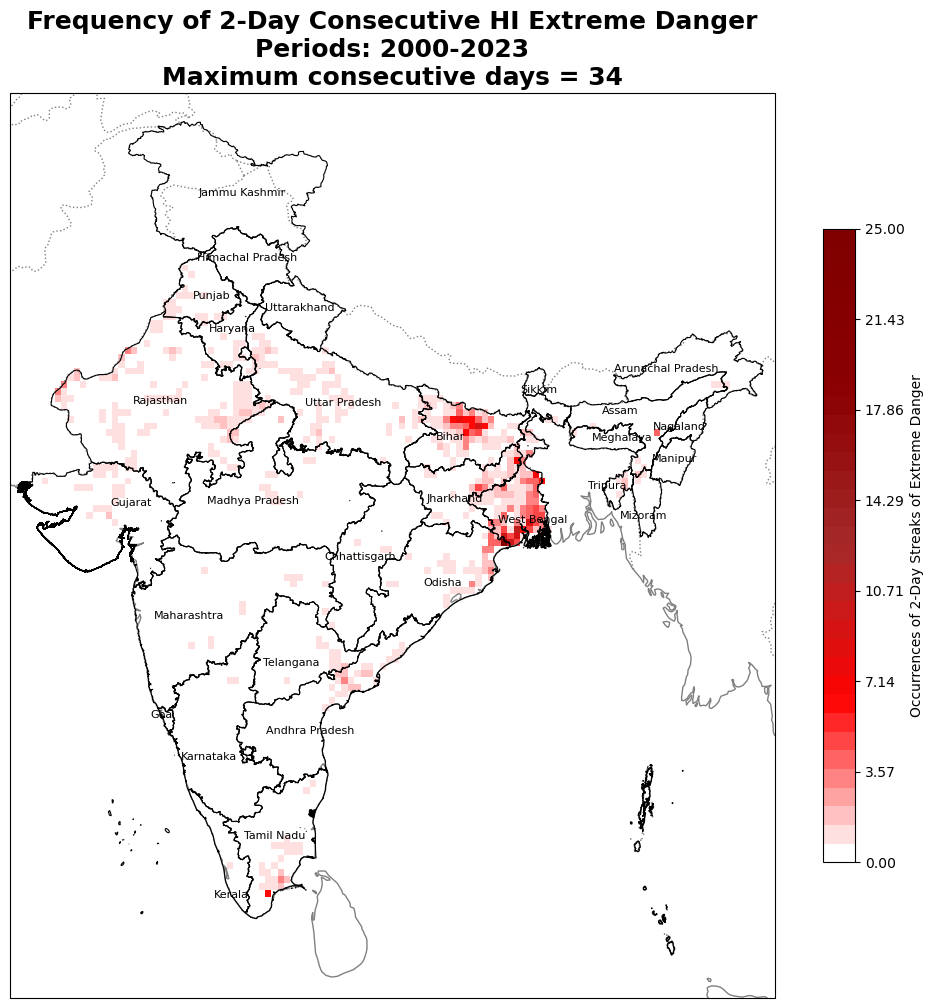

In [191]:
# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Define colormap
colors = ["white", "r", "brown", "darkred", "maroon"] # Gradient from white to brown
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_days_ED)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_days_ED, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=25)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Danger")
cbar.set_ticks(np.linspace(0, 25, num=8))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Extreme Danger\nPeriods: 2000-2023\nMaximum consecutive days = {streak_days_ED.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

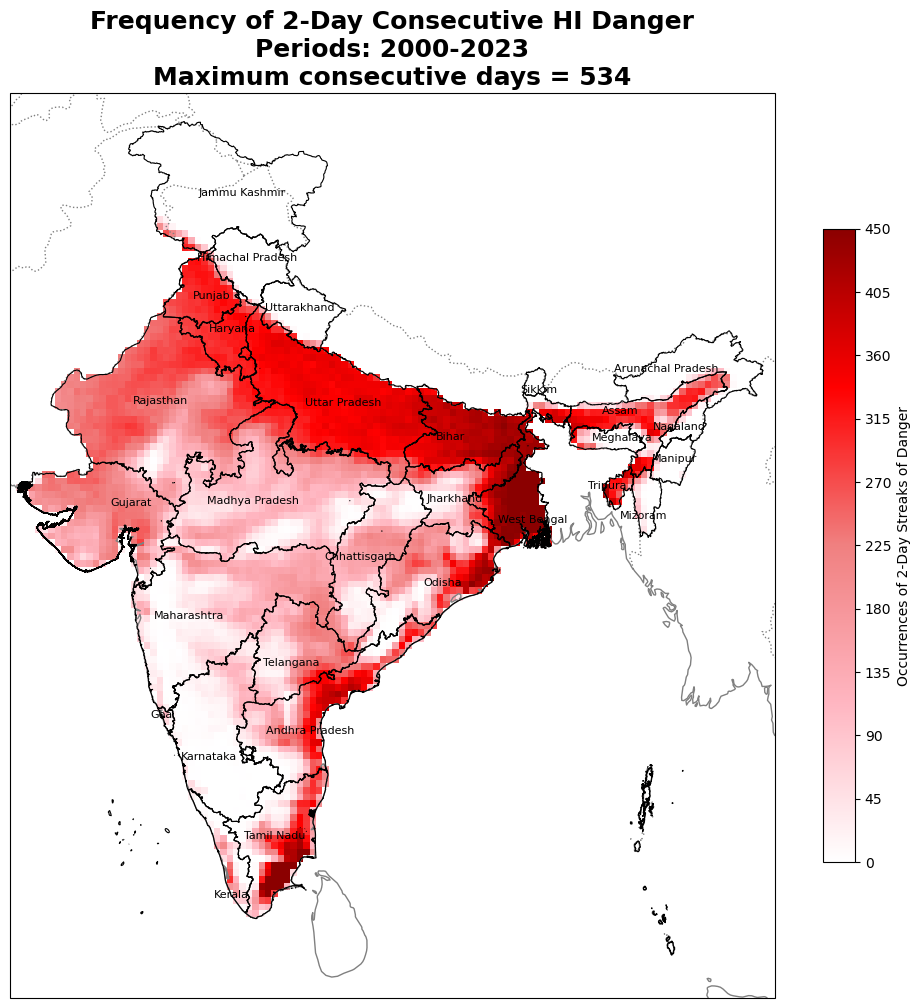

In [192]:
# Total occurrences
total_streak_days_D = streak_days_D

# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Define colormap
colors = ["white", "lightpink", "lightcoral", "red", "darkred"]  # Gradient from white to red
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(total_streak_days_D)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, total_streak_days_D, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=450)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Danger")
cbar.set_ticks(np.linspace(0, 450, num=11))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Danger\nPeriods: 2000-2023\nMaximum consecutive days = {total_streak_days_D.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

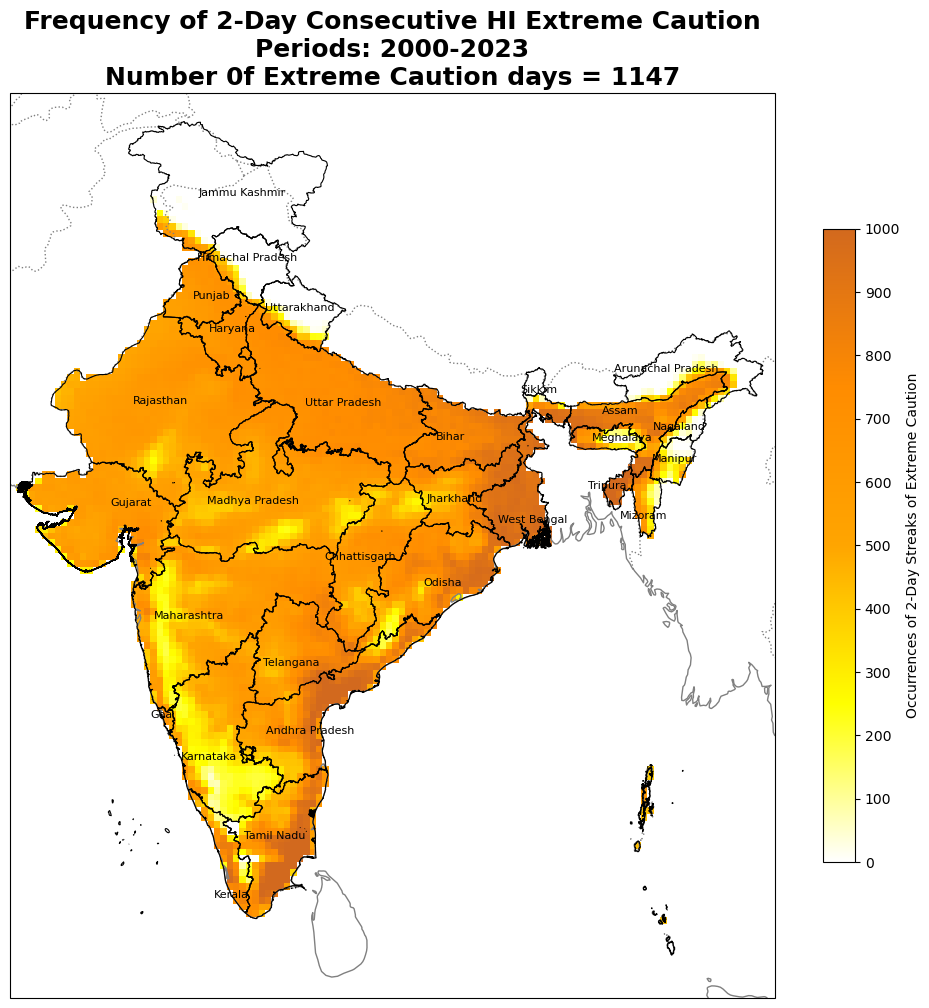

In [193]:
# Total occurrences
total_streak_days_EC = streak_days_EC + streak_days_D + streak_days_ED

# Plot heatmap of 2-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)
    
# Define colormap
colors = ["white", "yellow", "orange", "darkorange", "chocolate"]  # Gradient from white to orange
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(total_streak_days_EC)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, total_streak_days_EC, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=1000)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Caution")
cbar.set_ticks(np.linspace(0, 1000, num=11))


# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Extreme Caution\nPeriods: 2000-2023\nNumber 0f Extreme Caution days = {(total_streak_days_EC).max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

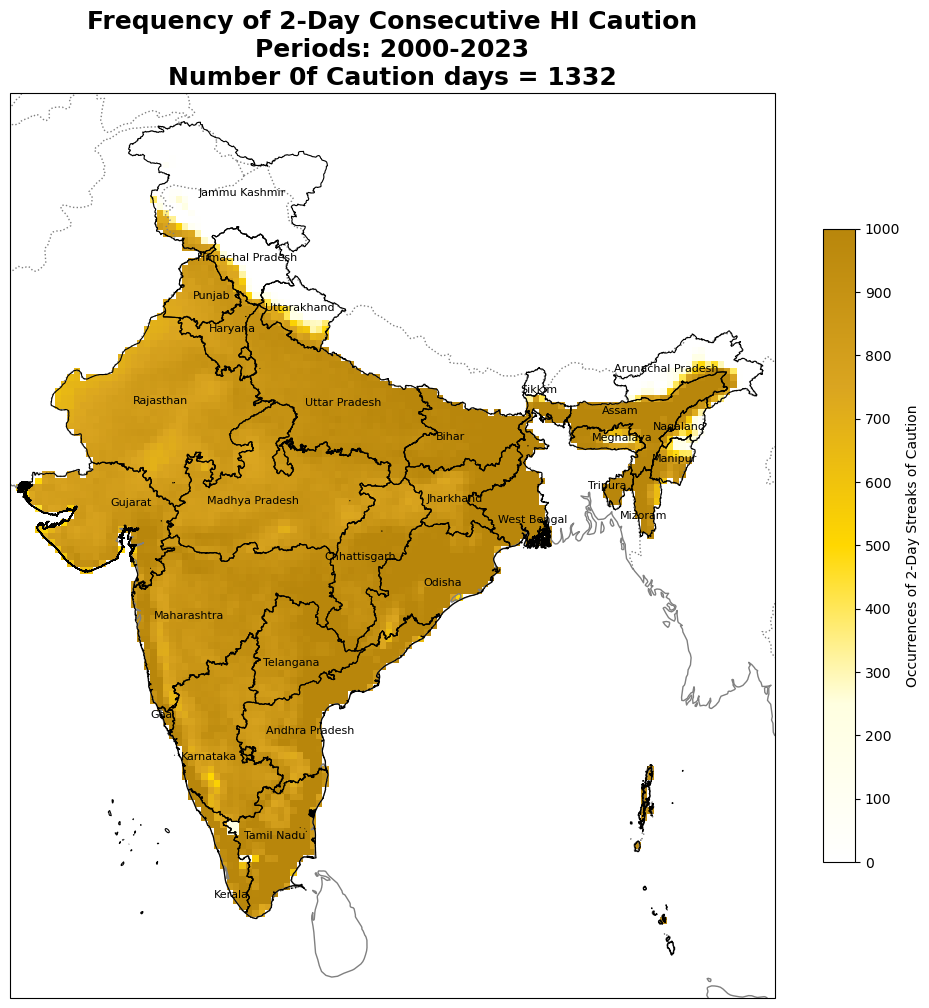

In [194]:
# total occurrences
total_streak_days_C = streak_days_C + streak_days_EC + streak_days_D + streak_days_ED

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)
    
# Define colormap
colors = ["white", "lightyellow", "gold", "goldenrod", "darkgoldenrod"]  # Gradient from white to yellow
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(total_streak_days_C)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, total_streak_days_C, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=1000)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Caution")
cbar.set_ticks(np.linspace(0, 1000, num=11))

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive HI Caution\nPeriods: 2000-2023\nNumber 0f Caution days = {total_streak_days_C.max()}", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.2 - T category daily maximum frequency/intensity

6.7.2.1 - T° extreme danger

8767


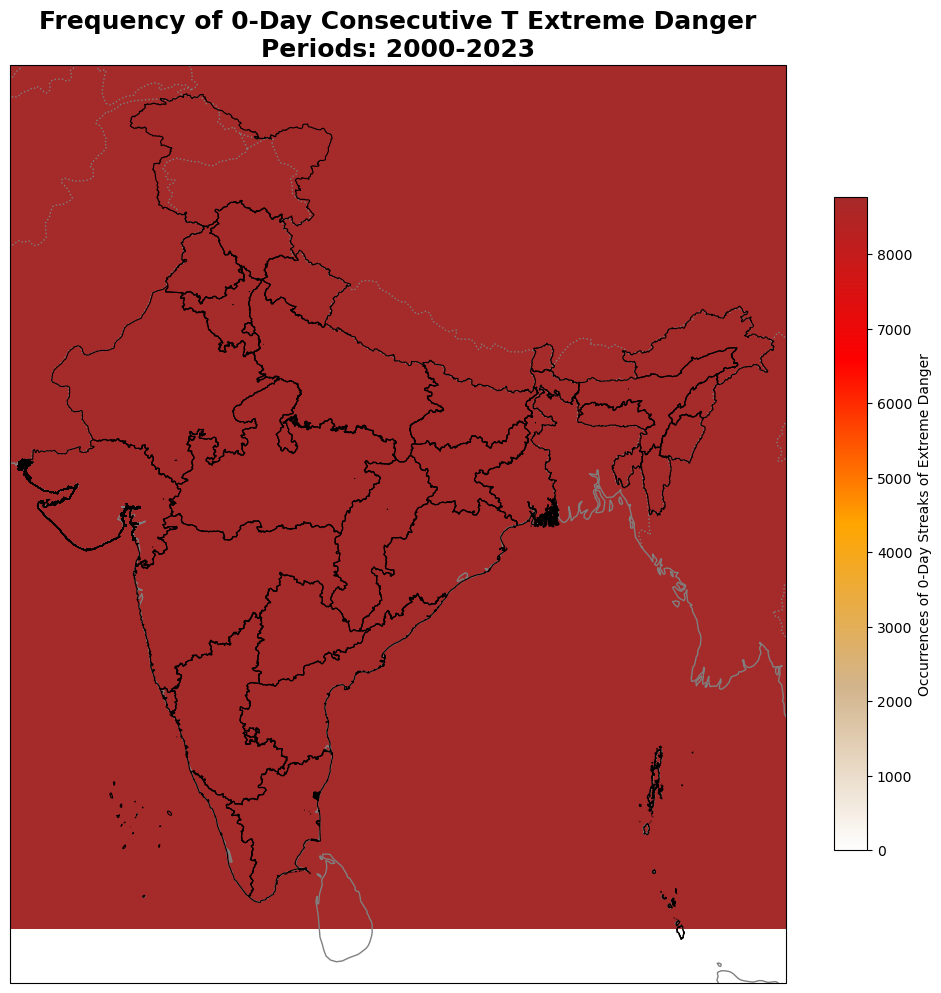

In [ ]:
# Select the specific period
selected_period = T_extreme_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))

# Extract data for a specific streak length (5-day streaks)
streak_length = 0

streak_2days = count_heatwave_events(
    selected_period['daily_max_temp'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_2days.max())

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Define colormap
colors = ["white", "tan", "orange", "red", "brown"] # Gradient from white to brown
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_2days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_2days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=int(np.max(streak_2days)))

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Danger")

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive T Extreme Danger\nPeriods: 2000-2023", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.2.2 - T° danger

254


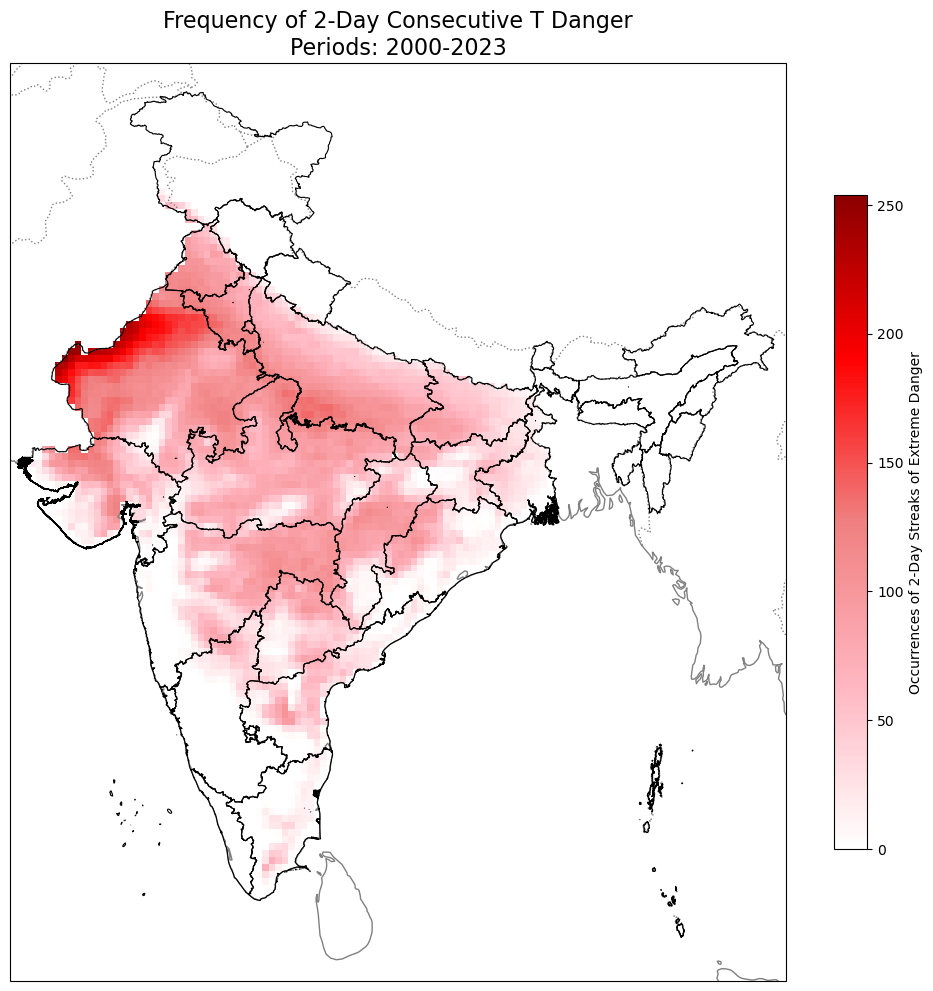

In [ ]:
# Select the specific period
selected_period = T_danger_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))

# Extract data for a specific streak length (5-day streaks)
streak_length = 2

streak_2days = count_heatwave_events(
    selected_period['daily_max_temp'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_2days.max())

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Define colormap
colors = ["white", "lightpink", "lightcoral", "red", "darkred"]  # Gradient from white to red
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_2days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_2days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=int(np.max(streak_2days)))

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Danger")

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive T Danger\nPeriods: 2000-2023", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.2.3 - T° extreme caution

552


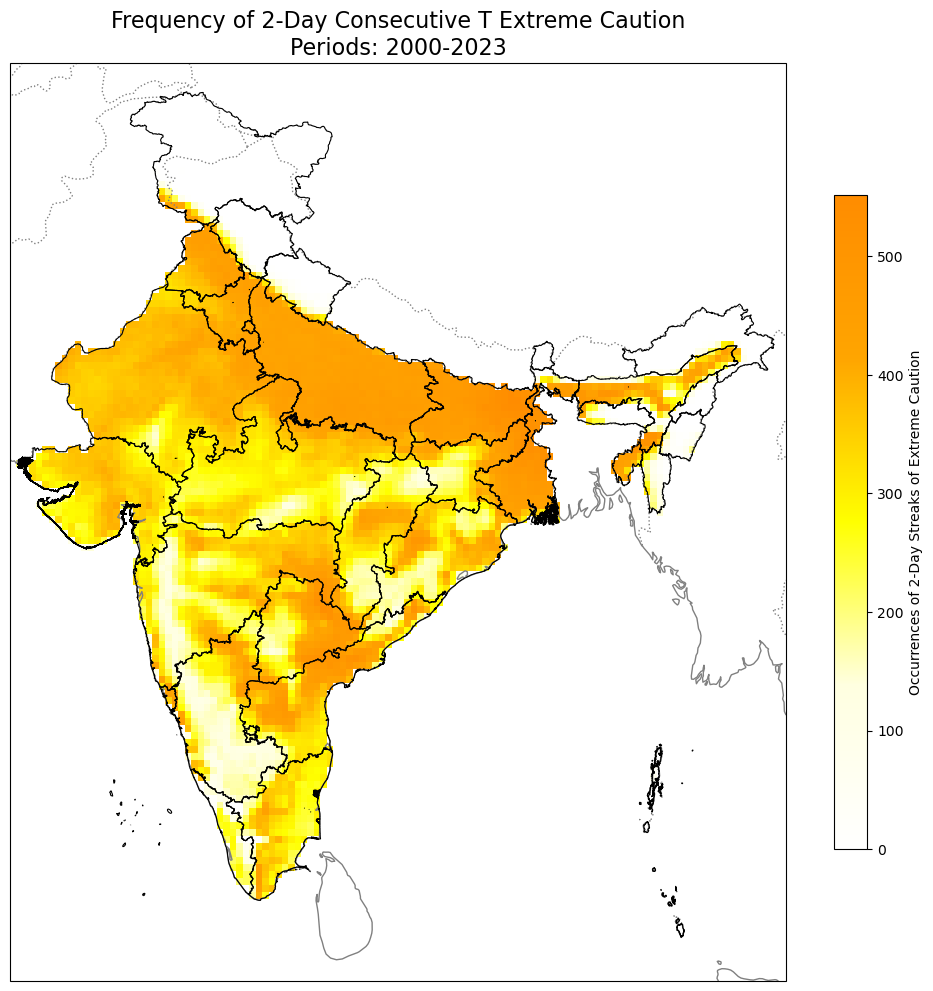

In [ ]:
# Select the specific period
selected_period = T_extreme_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))

# Extract data for a specific streak length (e.g., 5-day streaks)
streak_length = 2
streak_2days = count_heatwave_events(
    selected_period['daily_max_temp'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_2days.max())

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Define colormap
colors = ["white", "lightyellow", "yellow", "orange", "darkorange"]  # Gradient from white to orange
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_2days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_2days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=int(np.max(streak_2days)))

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Extreme Caution")

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive T Extreme Caution\nPeriods: 2000-2023", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

6.7.2.4 - T° caution

768


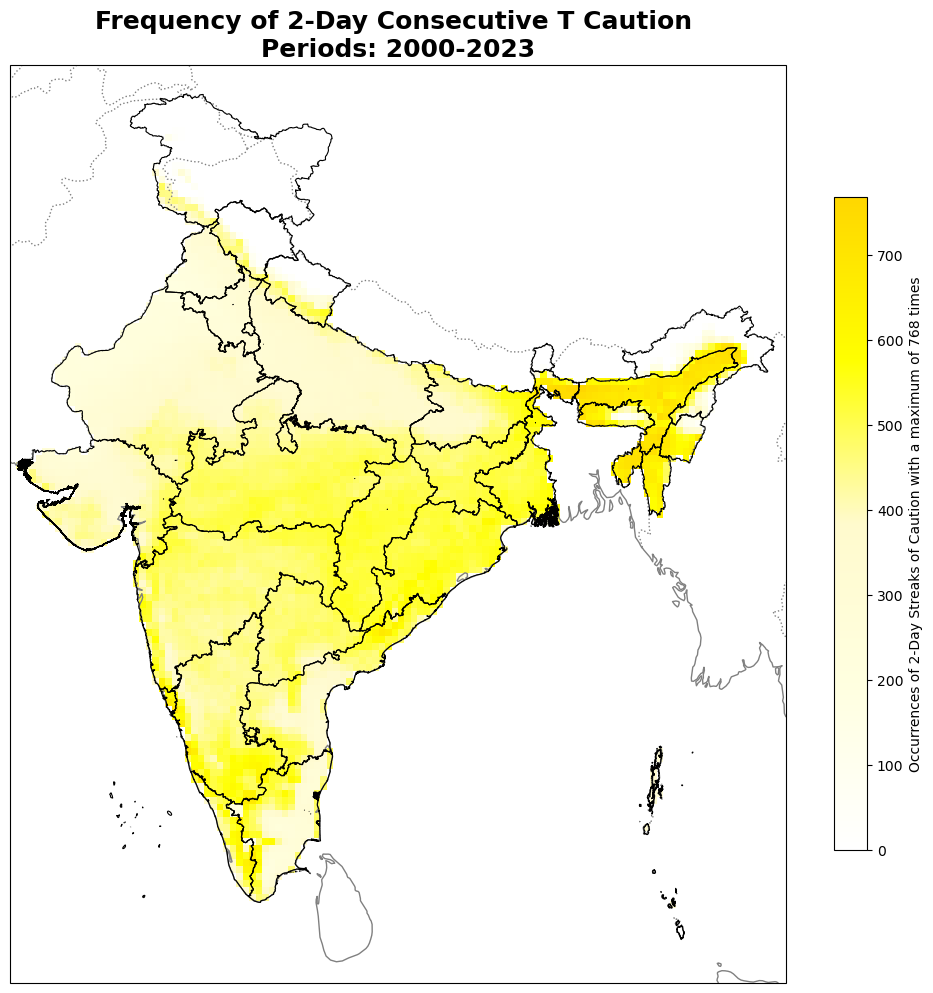

In [ ]:
# Select the specific period
selected_period = T_caution_daily_max.sel(time=slice('2000-01-01', '2023-12-31'))

# Extract data for a specific streak length (e.g., 2-day streaks)
streak_length = 2

streak_2days = count_heatwave_events(
    selected_period['daily_max_temp'],
    min_streak=streak_length,
    threshold=1 # Since data is binary (1 = Extreme Danger, 0 = Not Extreme Danger)
)

print(streak_2days.max())

# Plot heatmap of 5-day streak occurrences
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.LAND, facecolor="white")

# Add Indian states boundaries 
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Define colormap
colors = ["white", "lightyellow", "lemonchiffon", "yellow", "gold"]  # Gradient from white to yellow
cmap = LinearSegmentedColormap.from_list("streak_cmap", colors, N=int(np.max(streak_2days)))

# Plot the heatmap
lon, lat = np.meshgrid(selected_period['longitude'], selected_period['latitude'])
heatmap = ax.pcolormesh(lon, lat, streak_2days, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=int(np.max(streak_2days)))

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label(f"Occurrences of {streak_length}-Day Streaks of Caution with a maximum of {int(np.max(streak_2days))} times")

# Add title and labels
plt.title(f"Frequency of {streak_length}-Day Consecutive T Caution \nPeriods: 2000-2023", fontsize=18, fontweight = 'bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()